<a href="https://colab.research.google.com/github/protogia/jffa/blob/main/jffa_fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration of a Fashion-Dataset

*Initial information: This notebook is part of my **just-for-fun-analytics**-series.*

## About the dataset: (from kaggle)

This fashion dataset provides a comprehensive collection of contemporary styles and trends from diverse sources across various demographics.

It includes detailed attributes such as clothing types, colors, patterns, and textures, curated to support trend analysis, style prediction, and consumer behavior studies. The dataset encompasses a wide range of fashion items, from casual wear to haute couture, covering both historical trends and current fashion seasons.

Navigate to [source](https://www.kaggle.com/datasets/rahul2312kaggle/fashion-dataset/data) for more informations on kaggle.

## Preconfiguration for Colab-Notebook to get prefered readability & layout
- Disabling IPython-warnings
- full-width layout for plots

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.display import display, HTML

# Set notebook width to 100%
display(HTML(""))
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.autolayout'] = True

## Downloading the data
1. First I need to mount my personla google-drive to be able to save the dataset permanently.
2. Next I need to install the kaggle-client to download datasets via kaggle-username & dataset-name. To use the client you need to download an api-key from kaggle and store it into '/content/drive/MyDrive/kaggle' as described [here](https://www.kaggle.com/code/quanteuan/download-kaggle-data-to-google-drive-colab).

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [6]:
!pip install kaggle;

In [7]:
!kaggle datasets download -d rahul2312kaggle/fashion-dataset

import zipfile
import os
source_filepath = '/content/fashion-dataset.zip'
dest_filepath = '/content/fashion-dataset'

with zipfile.ZipFile(source_filepath, 'r') as zip_ref:
    zip_ref.extractall(dest_filepath)

!rm fashion-dataset.zip
print('Dataset Downloaded', os.listdir(dest_filepath))

Dataset URL: https://www.kaggle.com/datasets/rahul2312kaggle/fashion-dataset
License(s): MIT
Dataset Downloaded ['Fashion(Data Points) - Form responses 1.csv']


## First Overview & Preparing data
First I want to explore the columns/features of a dataset.

At my first glance it seems like aside of a timestamp the dataset contains only categorical data.

In [8]:
import pandas as pd

df = pd.read_csv('/content/fashion-dataset/Fashion(Data Points) - Form responses 1.csv')
df.head(n=3)

,Timestamp,1.Age Group,2.Gender,3.Profession,Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),5. What’s your favorite color palette for clothing?,6. Do you prioritize functionality or aesthetics in your outfits?,7.Which of these best describes your wardrobe?,Section 3: Shopping Habits\n8. How often do you shop for new clothes?,9.What influences your clothing purchases the most?,10. Where do you typically shop for clothes? (Select all that apply),Section 4: Lifestyle\n11. How often do you attend formal events?,12.Do you often experiment with new styles or stick to what you know?,13. What kind of footwear do you wear most often?,14. How active is your daily lifestyle?,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices\n,"16.If you had to choose, would you prefer timeless pieces or trendy items?",17. From scale 1-10 how much do you think your clothing style reflects about your personality?,Section 2: Style Preferences,Column 18
0,14/01/2025 19:33:18,18–24,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN
1,21/01/2025 22:13:55,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Dark tones (navy, maroon)",Slightly prefer functionality,Mix-and-match (varied styles),Every few months,Sustainability,Thrift stores,- Occasionally (a few times a year),Sometimes experiment,Sandals/Flats,Moderately active,- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN
2,21/01/2025 22:24:31,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer functionality,Minimalist (few versatile pieces),Monthly,Comfort,Local boutiques,- Occasionally (a few times a year),Rarely experiment,Sneakers,Moderately active,- Extremely important,"Mostly timeless, some trendy",9.0,NaN,NaN


### Preprocessing columns
The naming of the columns seems like they contain questions from a public survey. Unfortunatly the columns aren't formatted in a proper way and therefore its hard to work with them. So I need to rename them:


In [9]:
import re

def clean_column(col):
    # Remove section headers
    col = re.sub(r'Section \d+:.*?(\n|$)', '', col)
    # Remove question numbers anywhere in the string (e.g., "1.", "17.")
    col = re.sub(r'^\d+\.*\s*', '', col)
    # Remove newlines and extra whitespace
    col = col.replace('\n', ' ').strip()
    col = re.sub(r'\s+', ' ', col)
    # Truncate at the first question mark, *including* it
    qm_index = col.find('?')
    if qm_index != -1:
        col = col[:qm_index + 1]

    # Remove all punctuation EXCEPT the question mark and minus
    col = re.sub(r'[^\w\s\?-]', '', col)

    # Lowercase and strip again
    col = col.strip()

    # Remove digits at the beginning again if left over
    col = re.sub(r'^\d+\s*', '', col)
    return col

df.columns = [clean_column(col) for col in df.columns]


In [10]:
df.head(n=0)

,Timestamp,Age Group,Gender,Profession,How would you describe your go-to daily outfit?,Whats your favorite color palette for clothing?,Do you prioritize functionality or aesthetics in your outfits?,Which of these best describes your wardrobe?,How often do you shop for new clothes?,What influences your clothing purchases the most?,Where do you typically shop for clothes?,How often do you attend formal events?,Do you often experiment with new styles or stick to what you know?,What kind of footwear do you wear most often?,How active is your daily lifestyle?,How important is comfort in your clothing choices,If you had to choose would you prefer timeless pieces or trendy items?,From scale 1-10 how much do you think your clothing style reflects about your personality?,,Column 18


### Preprocessing data
After preparing the columnnames for better handling, I need to preprocess the data.
1. Check whats going on with 'Column 18'
2. Cast the `string` to `categorical`-datatype.
3. Replace nan-values

#### Check whats going on with 'Column 18'
At first glance to seems like the column labeled as `Column 18` contains no data and also the column-name doesn't survive any information. Because of this  I'll delete all columns that do not provide any informations.

In [11]:
for col in df.columns:
  if len(df[col].unique()) == 1:
    df.drop(labels=[col], axis="columns", inplace=True)
    print("Dropped "+col)

Dropped 
Dropped Column 18


#### Cast the `string` to `categorical`-datatype
For easier processing its a best practice to convert categorical data thats represented as strings into numerical equivalents. I'll use the build-in pandas.datatype `Categorical` for this purpose.

In [12]:
for column in df.columns[1:]:
  df[column] = df[column].astype('category')

#### Replace `nan`-values
When dealing with `nan`-values in dataframe there are mainly two options:
- deleting the entry
- replacing the `nan` with a Placeholder

Because I think a `nan` from a survey could be just caused when the interviewed person can't response to the question I'll replace it with the Category `No Response`.

In [13]:
# Drop rows where all columns except the first are NaN
df = df.dropna(subset=df.columns[1:], how='all')

# Replace remaining NaNs in categorical columns
for column in df.columns[1:]:
    if isinstance(df[column], pd.CategoricalDtype):
      if df[column].isna():
        df[column] = df[column].cat.add_categories('No Response').fillna('No Response')


## Diving into the data

First lets check the timerange of the survey and the distribution of the participants.

In [14]:
from datetime import timedelta

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

print("Survey started at", df['Timestamp'].min(), " and ended at", df['Timestamp'].max(), ".")
print("Survey lasted for", (df['Timestamp'].max() - df['Timestamp'].min()).days, "days.")

Survey started at 2025-01-14 19:33:18  and ended at 2025-02-17 22:08:18 .
Survey lasted for 34 days.


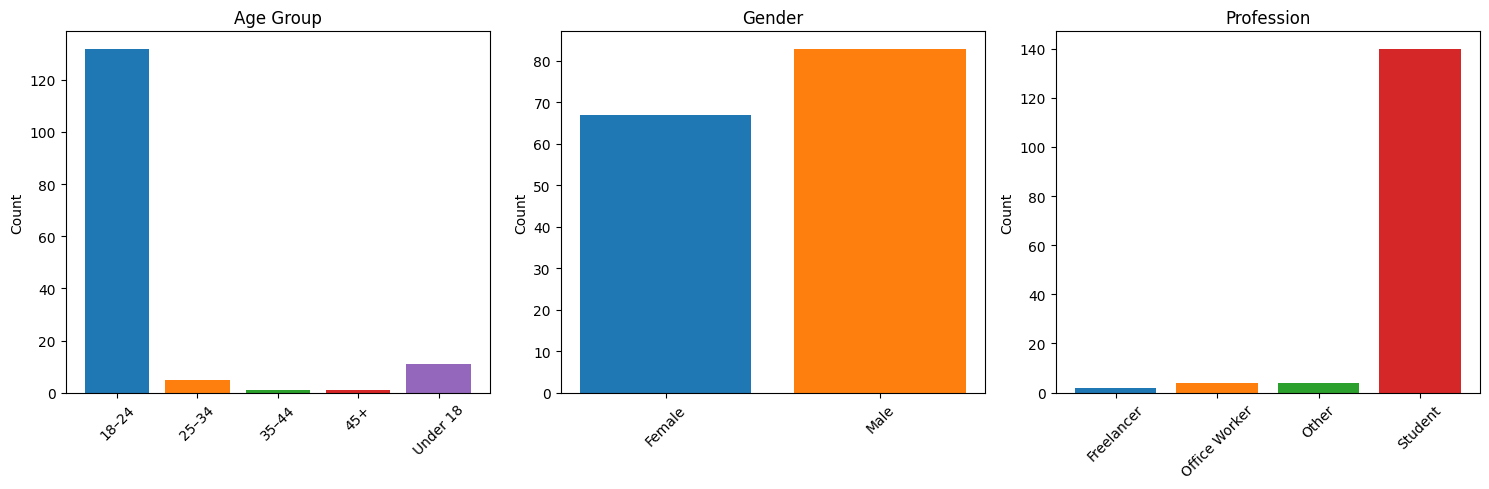

In [15]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 3, figsize=(15, 5))
counter = 0

for col in df.columns[1:4]:
    # Get all categories and their counts
    categories = df[col].cat.categories
    counts = df[col].value_counts().reindex(categories, fill_value=0)  # ensure all categories are included in order

    for i, cat in enumerate(categories):
        axis[counter].bar(cat, counts[cat])  # Plot one bar per category

    axis[counter].set_title(col)
    axis[counter].set_ylabel("Count")
    axis[counter].tick_params(axis='x', rotation=45)

    counter += 1

fig.show()

The timerange for the survey is only 34 days. Because its so short it won't be possible to see any seasonal effects.

According to the distributions the dataset isn't really evenly distributed in the categries `Age Group` and `Profession`. Therefore I should check if this Categories are at least evenly distributed over the `Gender`.

Gender       Female      Male
Age Group                    
18–24      0.462121  0.537879
25–34      0.600000  0.400000
35–44      1.000000  0.000000
45+        0.000000  1.000000
Under 18   0.181818  0.818182


<Axes: title={'center': 'Gender Distribution within Age Group'}, xlabel='Age Group'>

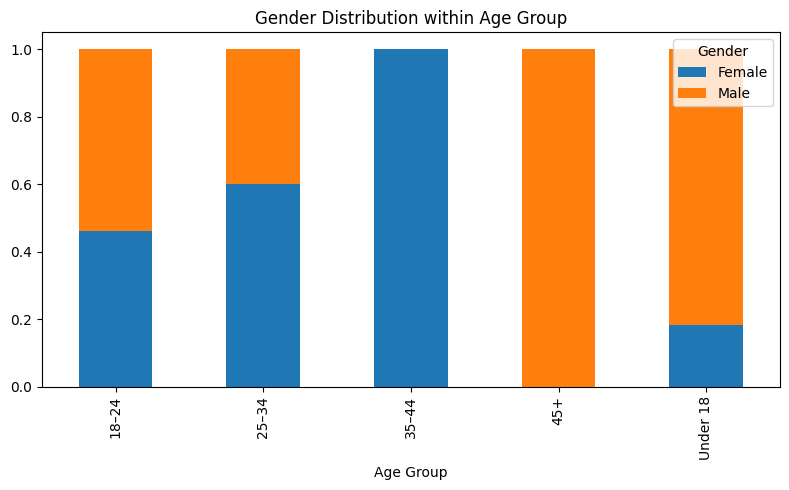

In [16]:
age_vs_gender = pd.crosstab(df['Age Group'], df['Gender'], normalize='index')
print(age_vs_gender)
age_vs_gender.plot(kind='bar', stacked=True, figsize=(8, 5), title='Gender Distribution within Age Group')

Gender         Female  Male
Profession                 
Freelancer       0.00  1.00
Office Worker    0.25  0.75
Other            0.75  0.25
Student          0.45  0.55


<Axes: title={'center': 'Gender Distribution within Profession'}, xlabel='Profession'>

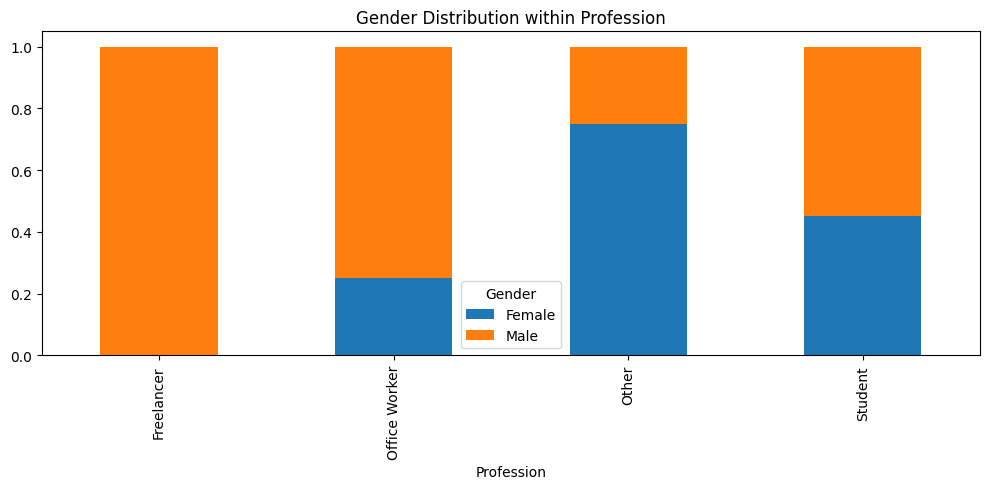

In [17]:
profession_vs_gender = pd.crosstab(df['Profession'], df['Gender'], normalize='index')
print(profession_vs_gender)
profession_vs_gender.plot(kind='bar', stacked=True, figsize=(10, 5), title='Gender Distribution within Profession')

Aside of the Categories `Freelancer` and `+45` the other categories seem evenly distributed.

Whereas the category `+45` is the smallest within the `Age Group`-distribution ´the category `Freelancer` is at least the second biggest within the `Profession`-Distribution. Even though these categories have just a really little share of the whole dataset. (see next plot)

When evaluating the results for this smaller categories, I need to carefully think about how to evaluate and weight them in comparison to bigger categories.

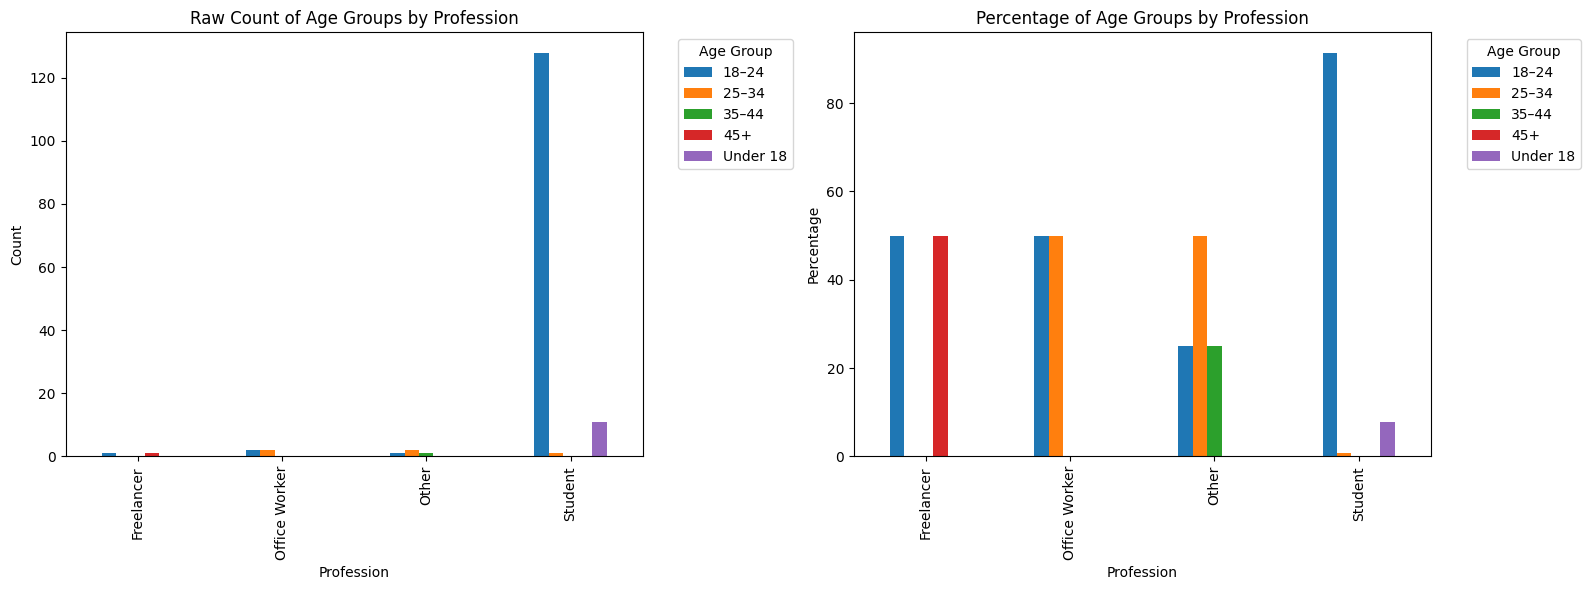

In [18]:

# Crosstab for raw counts
counts = pd.crosstab(df['Profession'], df['Age Group'])

# Crosstab for normalized (proportions)
normalized = pd.crosstab(df['Profession'], df['Age Group'], normalize='index') * 100  # convert to percent

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Plot raw counts
counts.plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_title('Raw Count of Age Groups by Profession')
axes[0].set_ylabel('Count')
axes[0].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot normalized percentages
normalized.plot(kind='bar', stacked=False, ax=axes[1])
axes[1].set_title('Percentage of Age Groups by Profession')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout
plt.tight_layout()
plt.show()

### Evaluating the Survey-Answers:
The idea is to start with the most obvious evaluation, which means to evaluation the survey-results over the participant-categories and in the next step I'll check for correlations within the survey itself (do people that answer question 1 mostly with answer a, answer question b the same way? etc.).

How would you describe your go-to daily outfit?


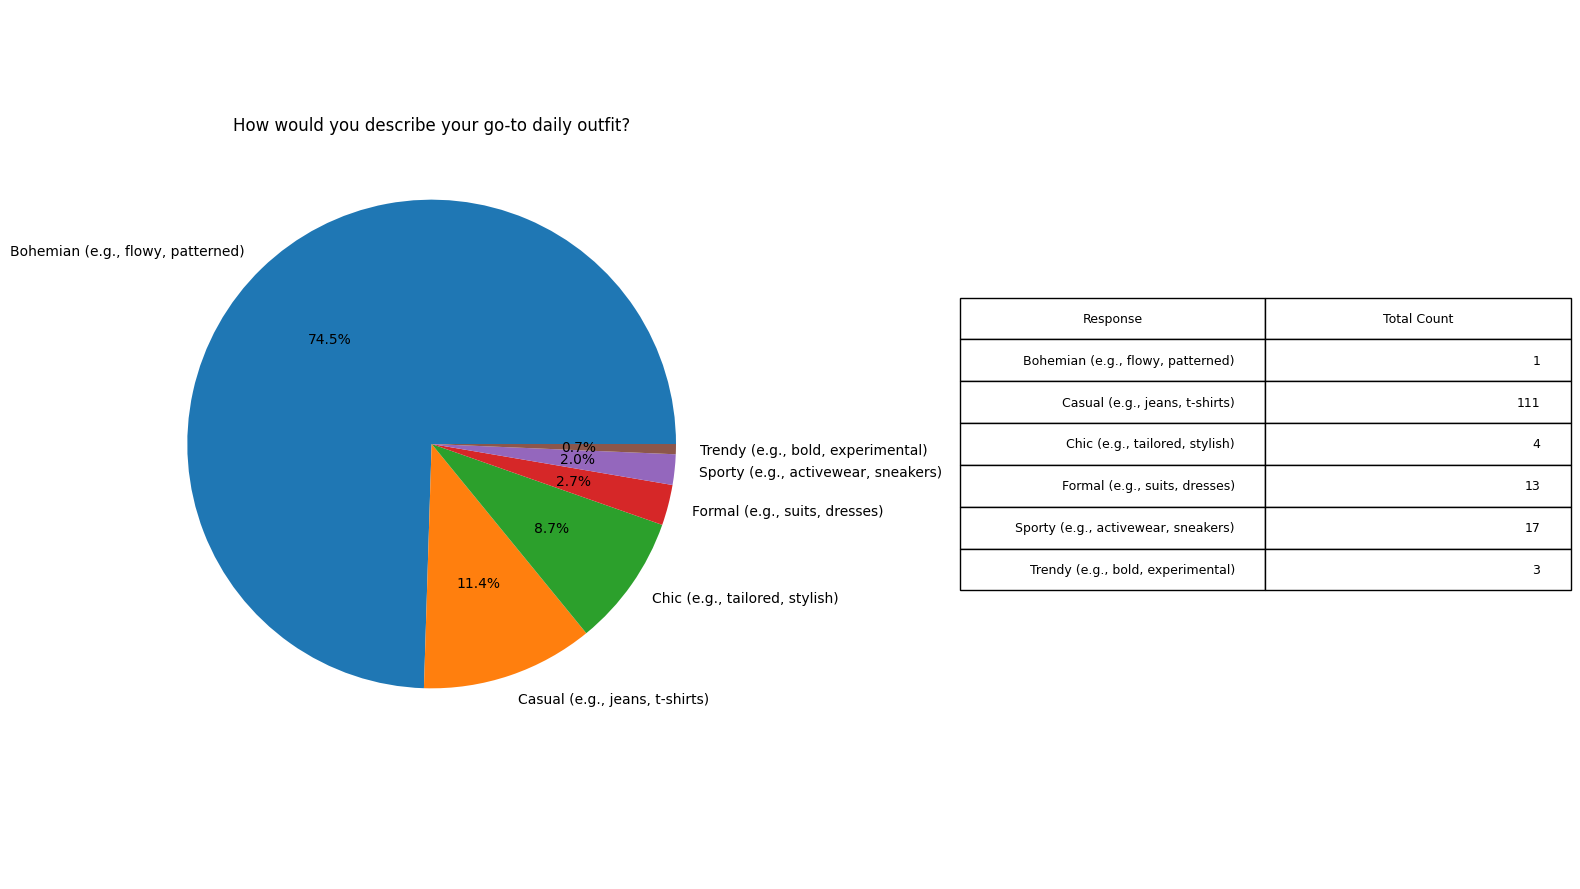

Whats your favorite color palette for clothing?


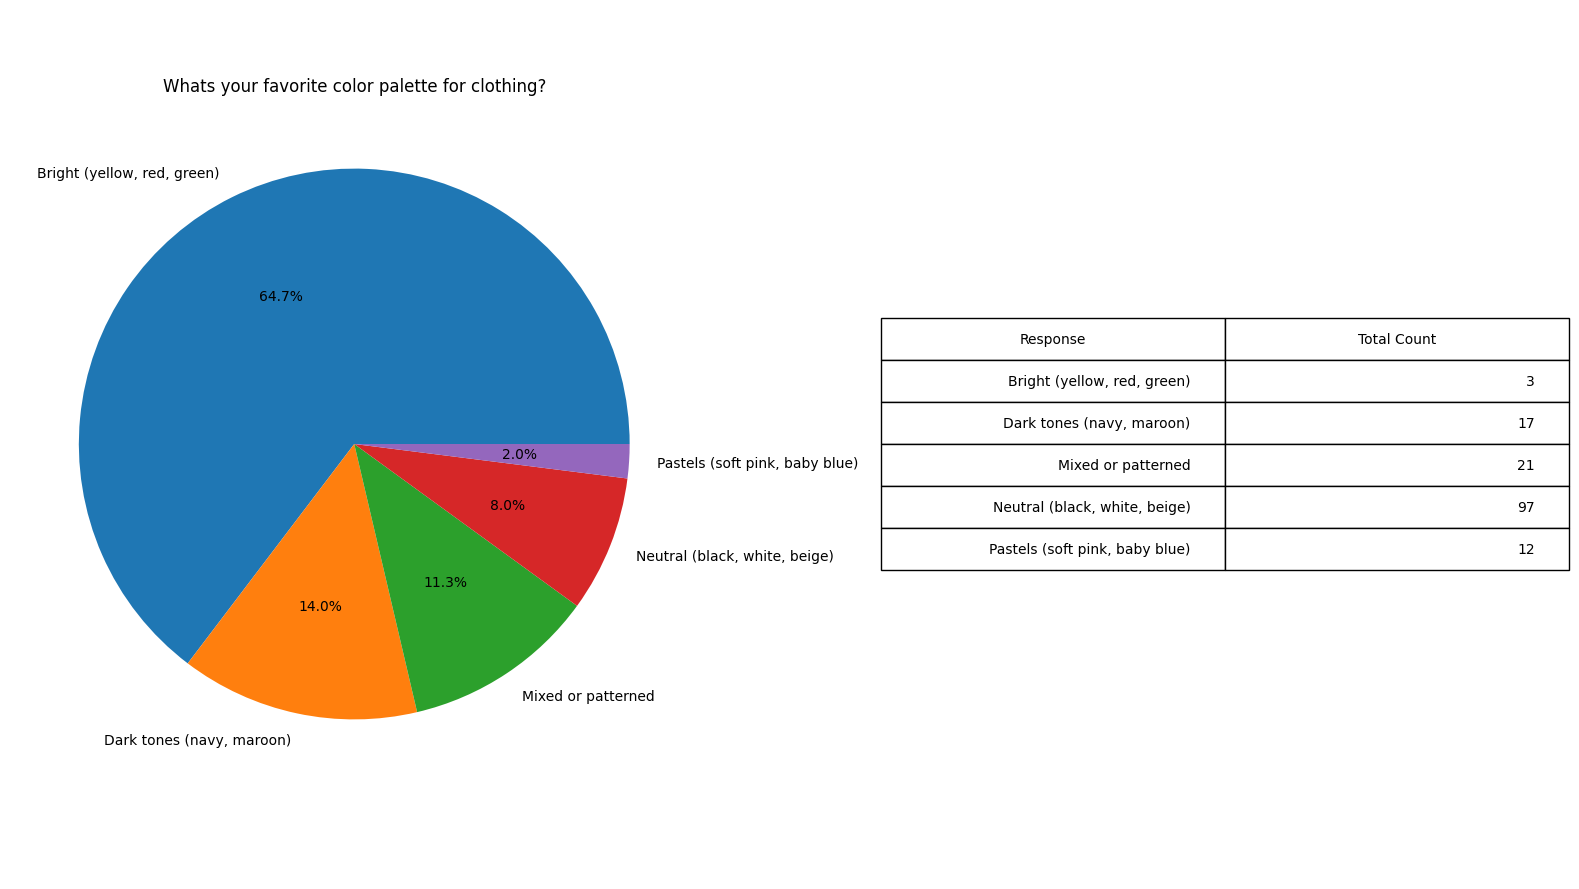

Do you prioritize functionality or aesthetics in your outfits?


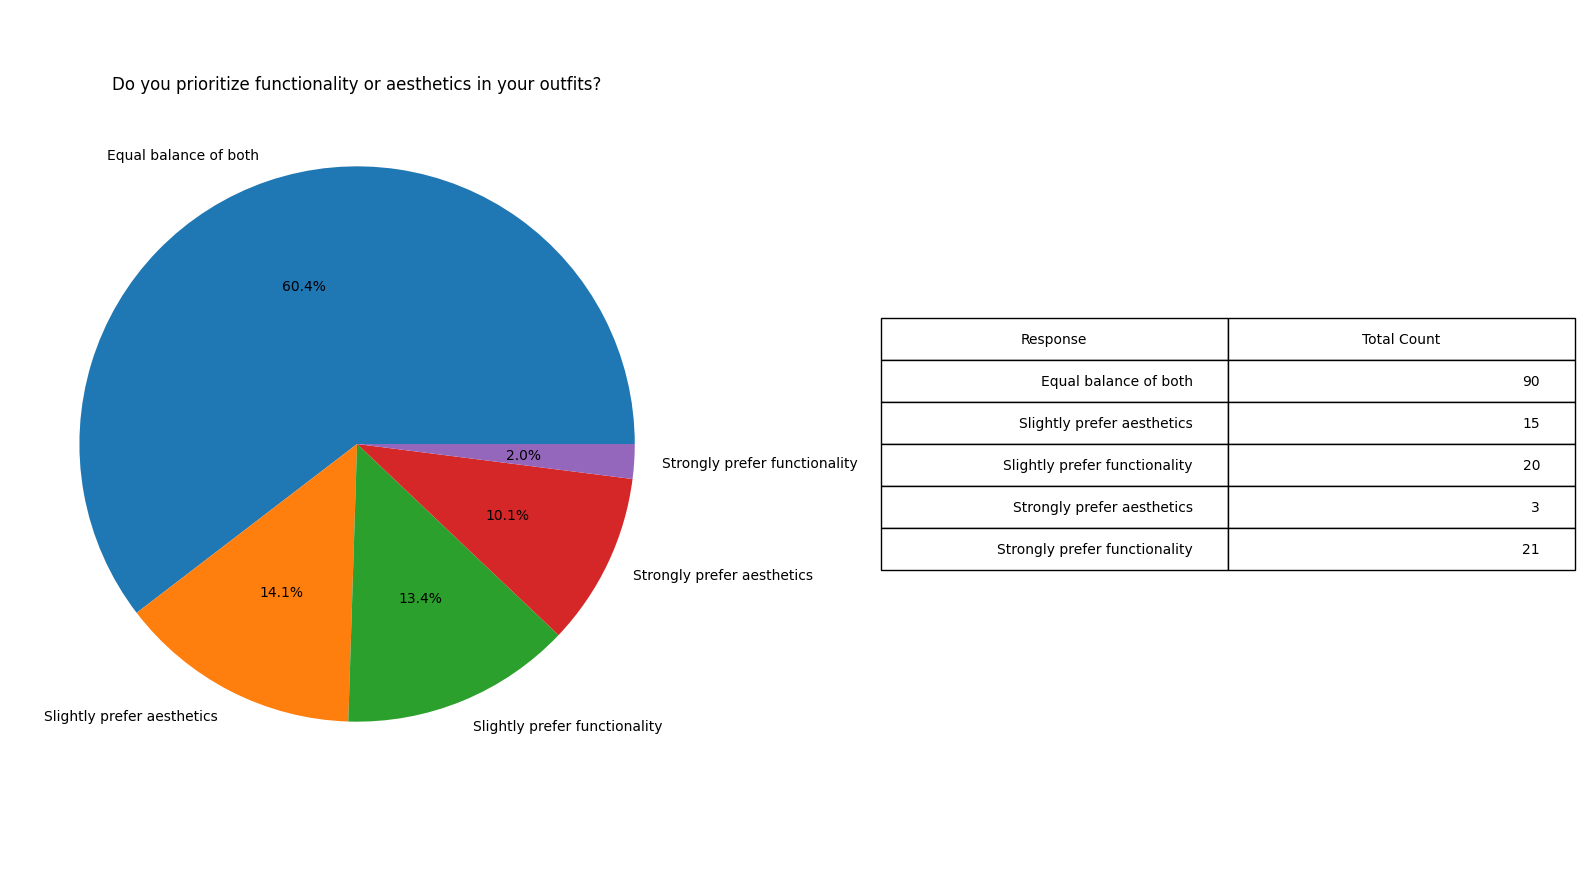

Which of these best describes your wardrobe?


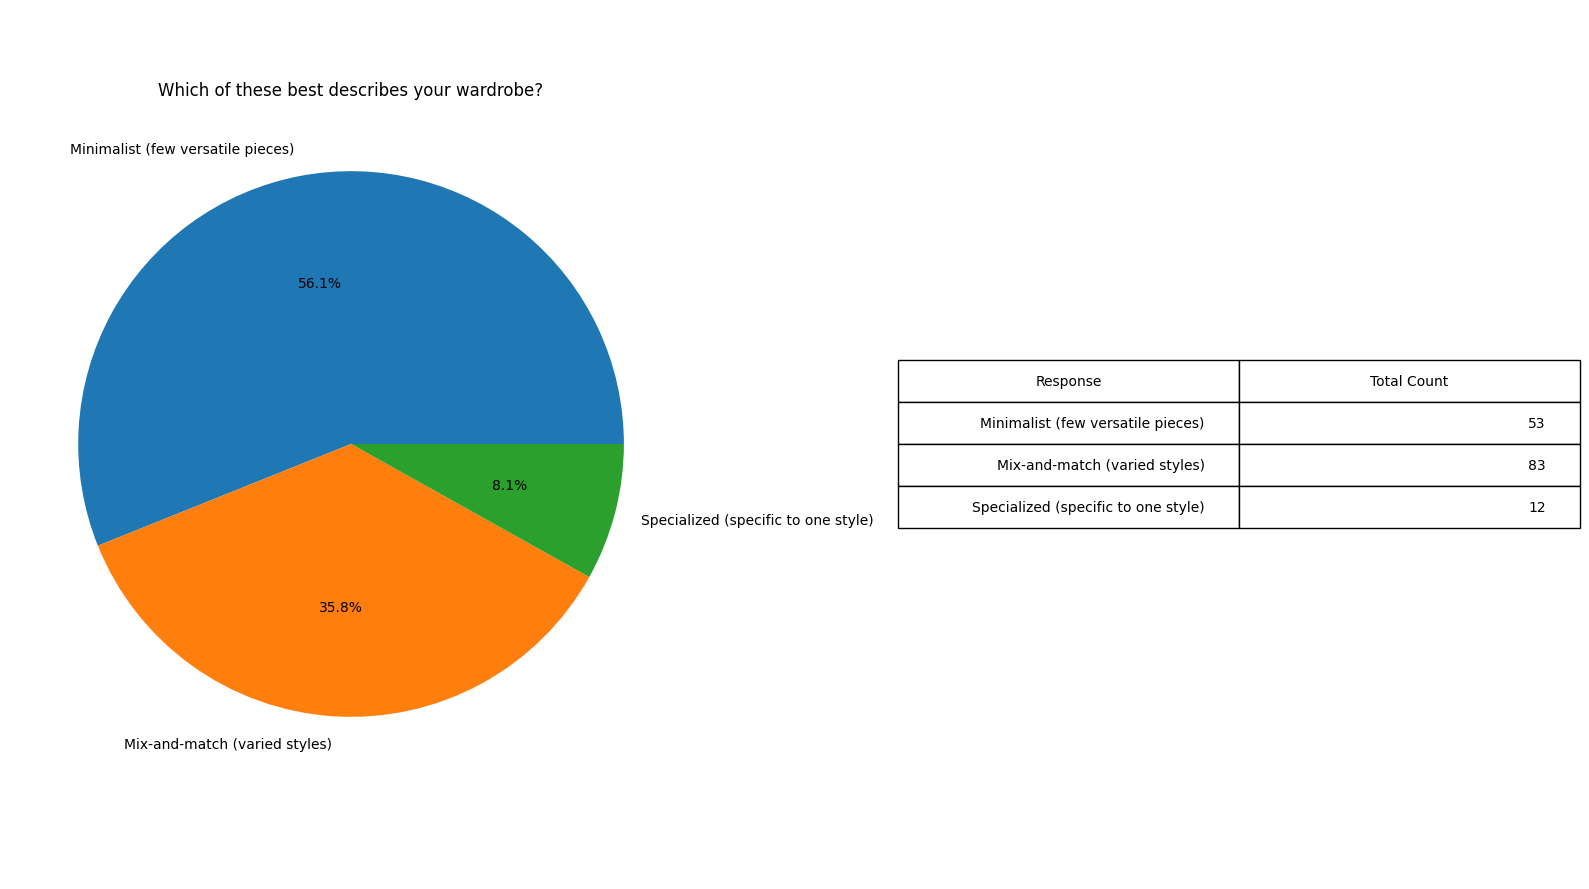

How often do you shop for new clothes?


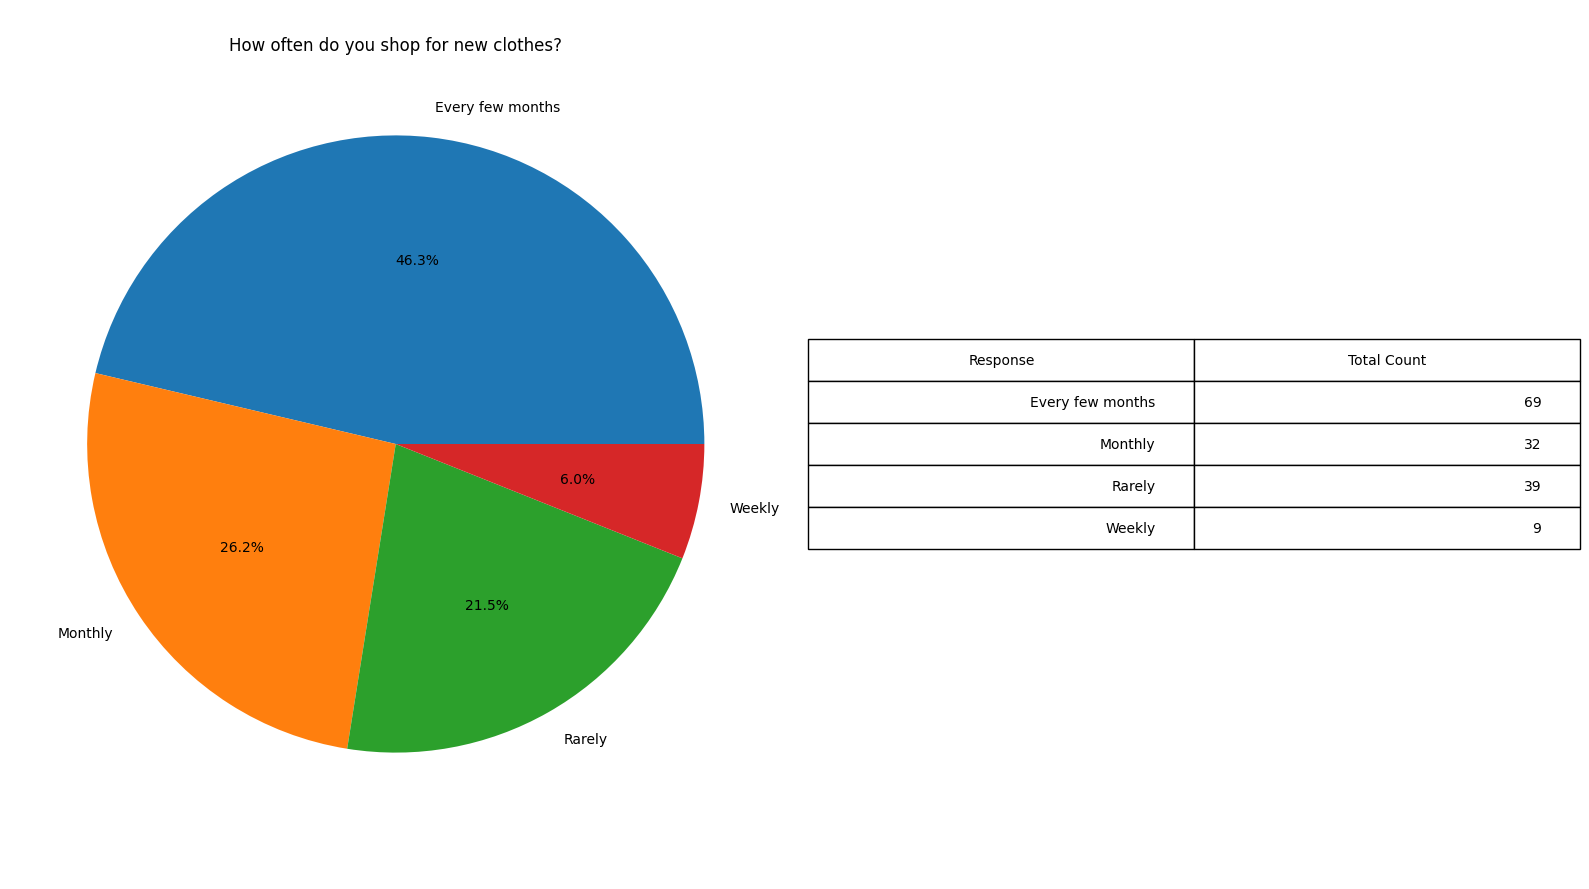

What influences your clothing purchases the most?


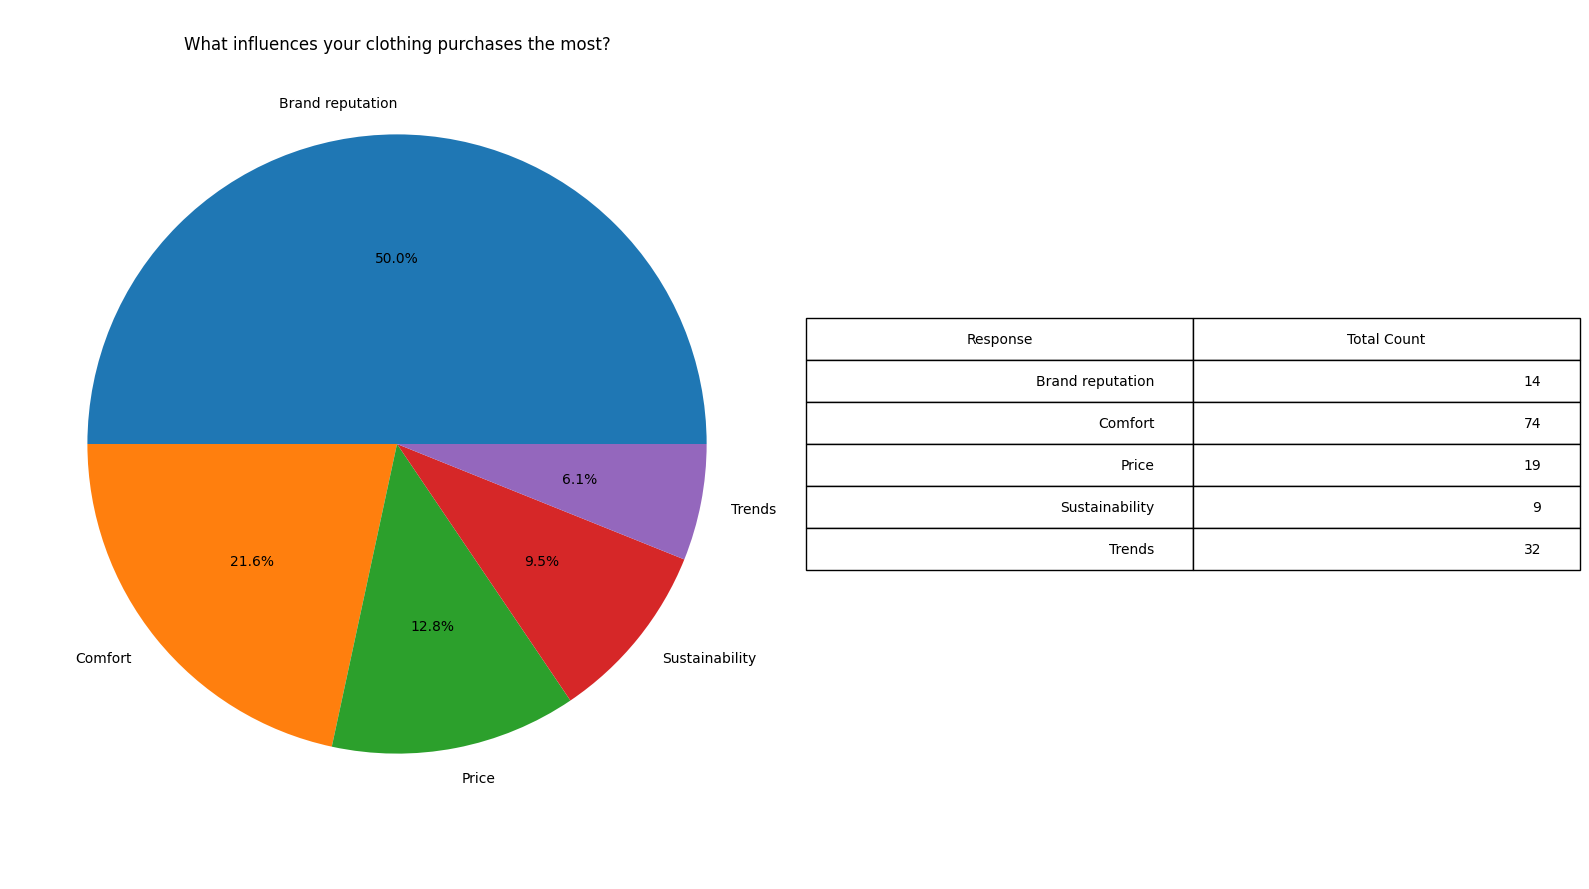

Where do you typically shop for clothes?


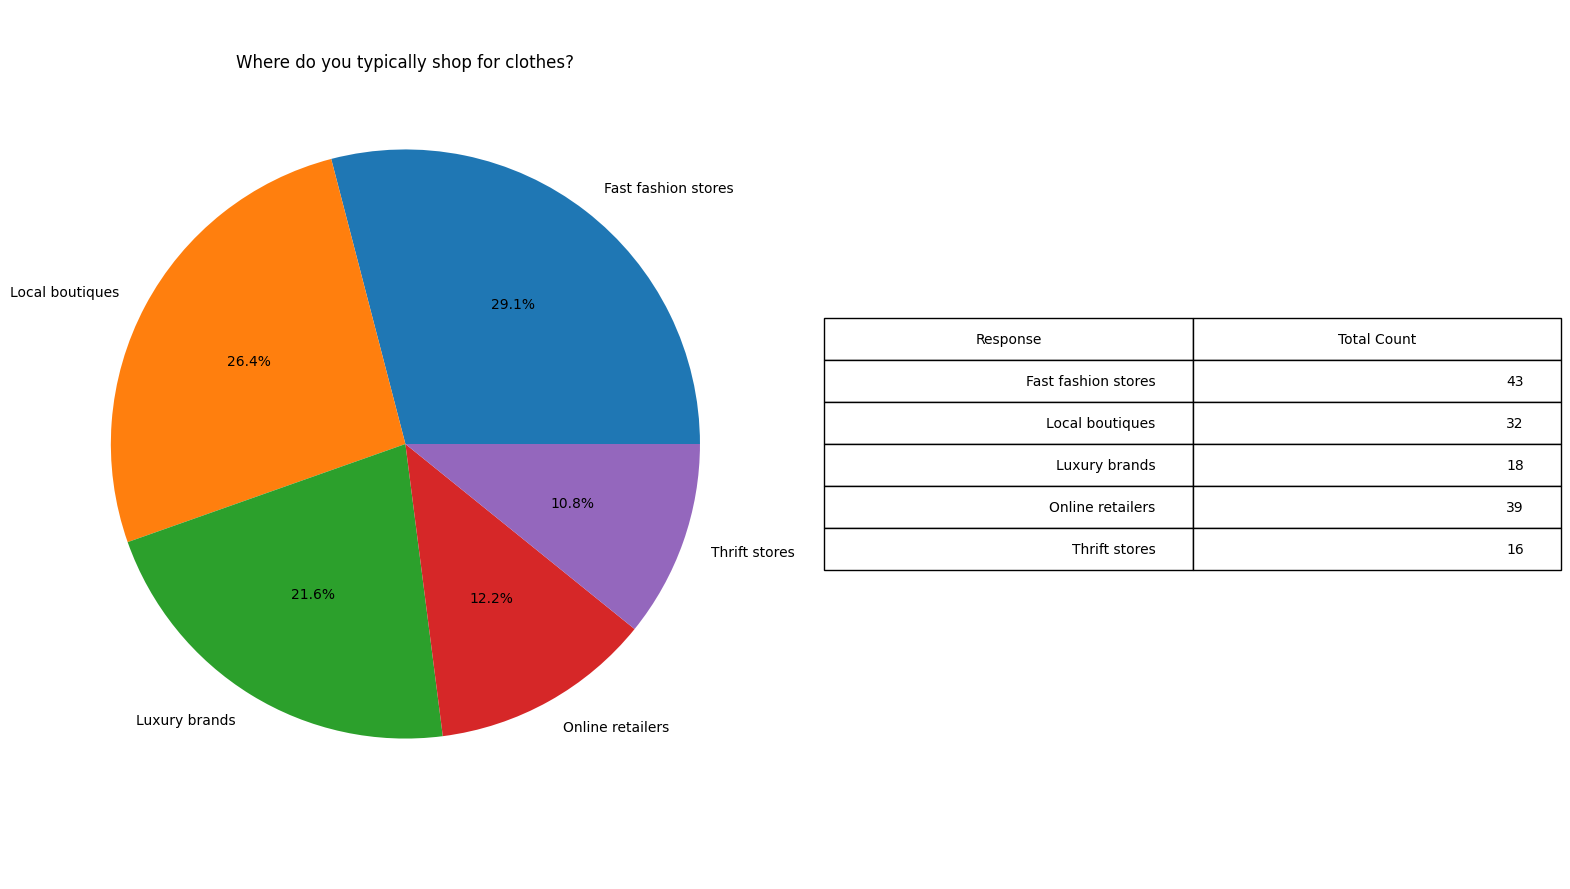

How often do you attend formal events?


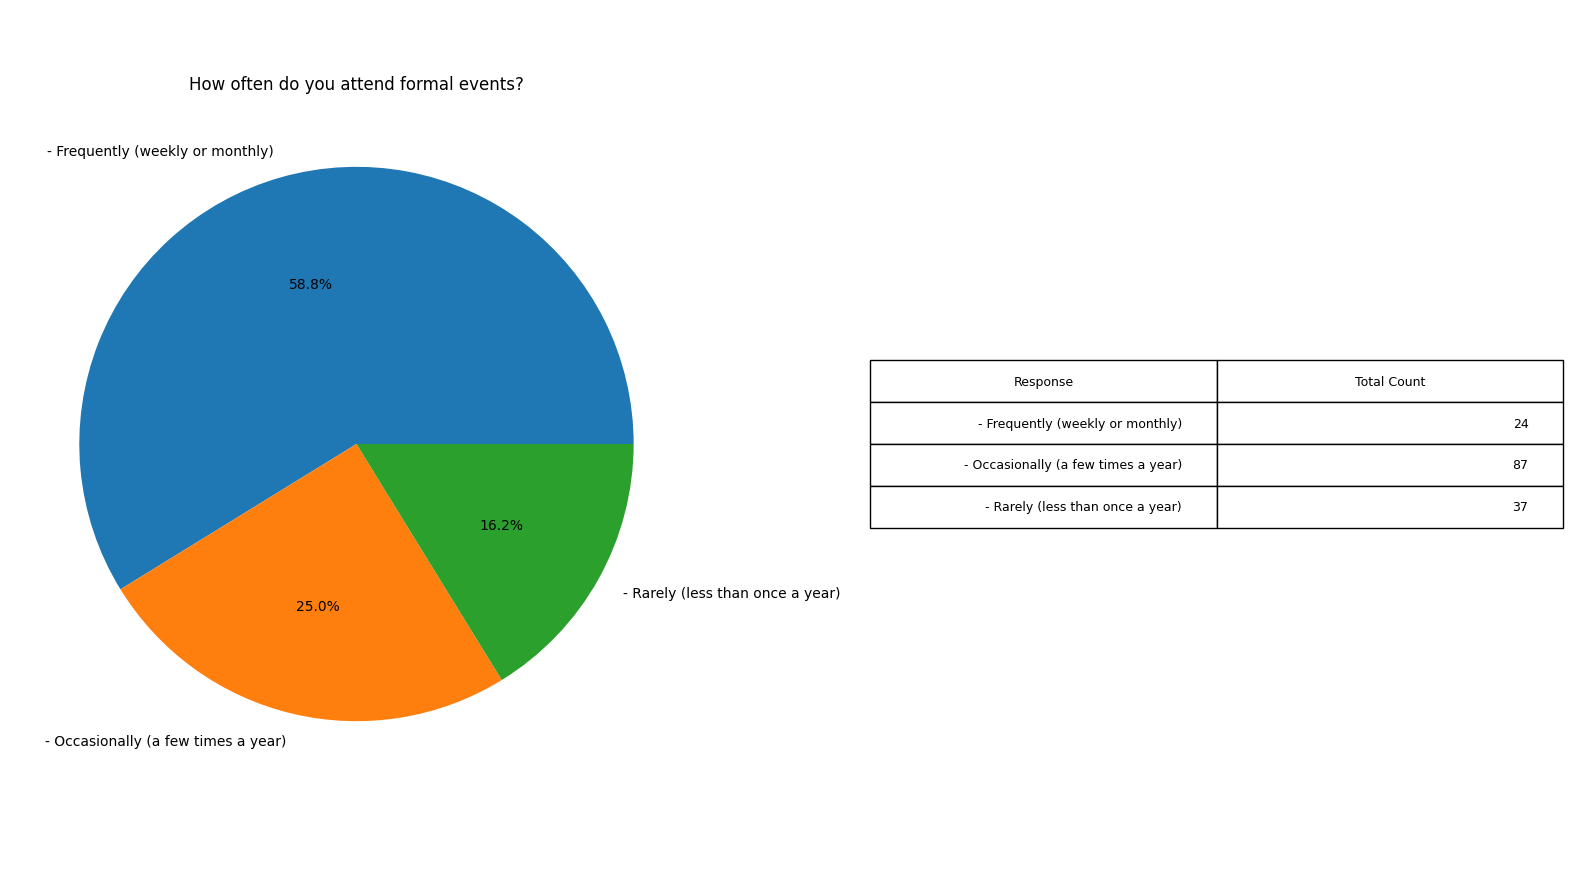

Do you often experiment with new styles or stick to what you know?


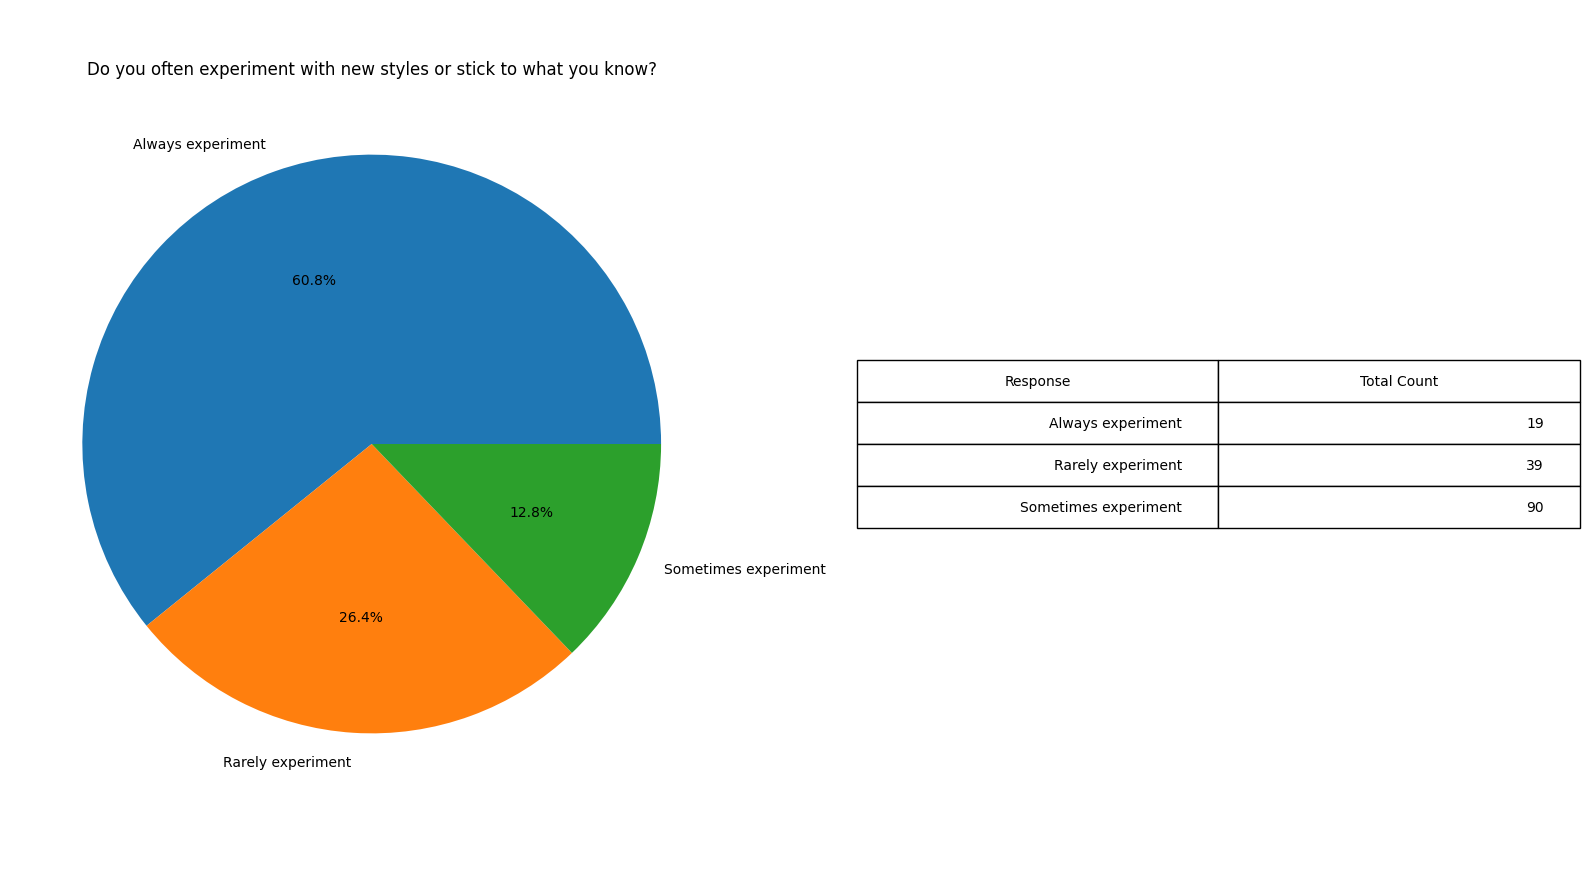

What kind of footwear do you wear most often?


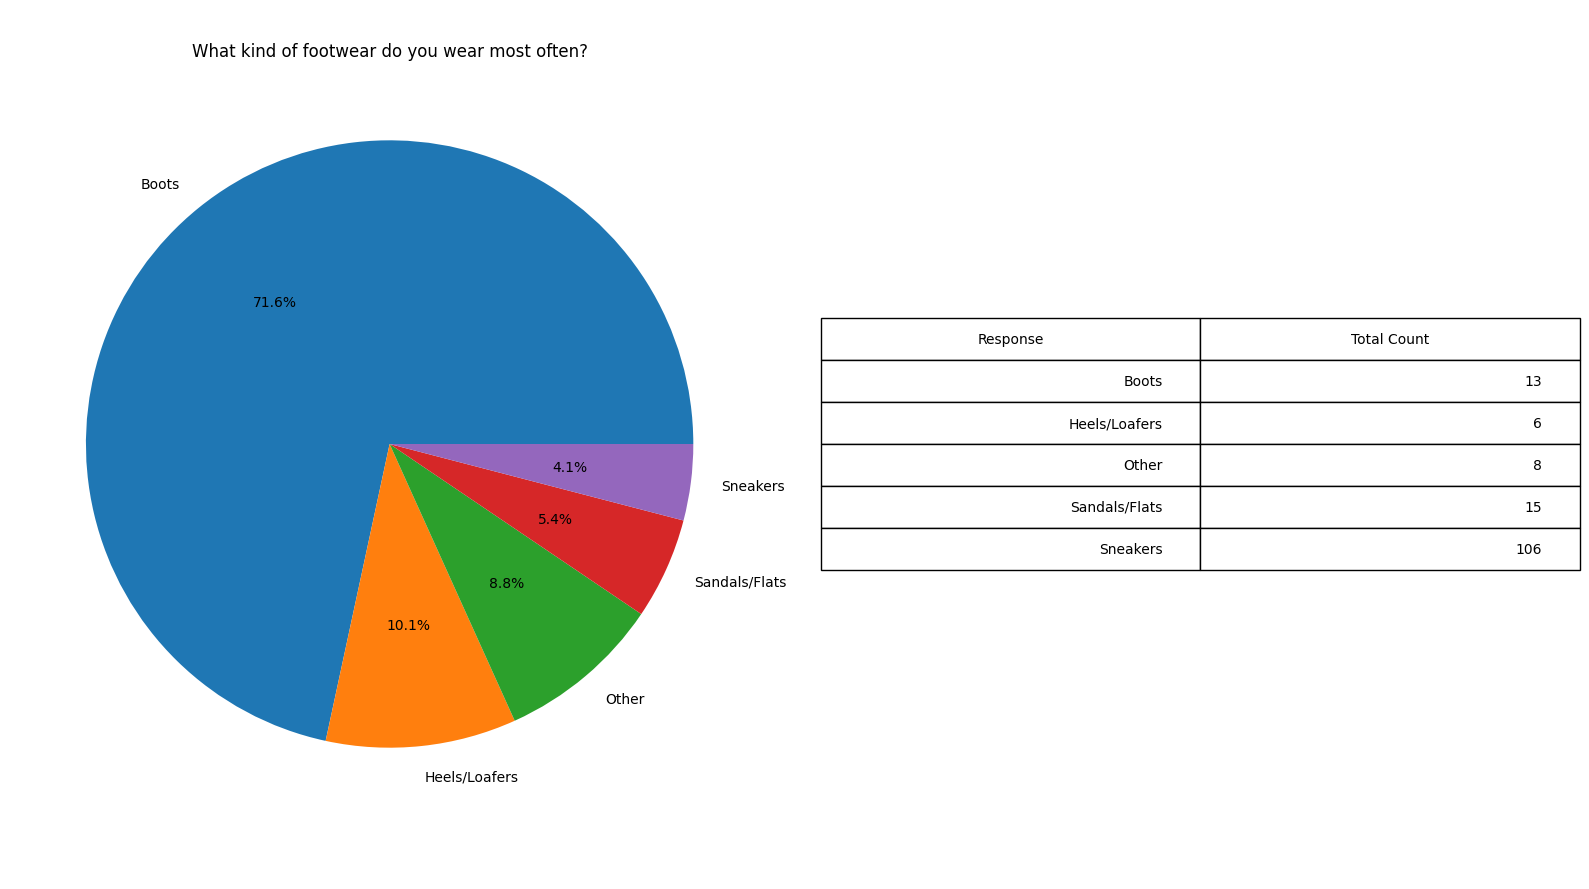

How active is your daily lifestyle?


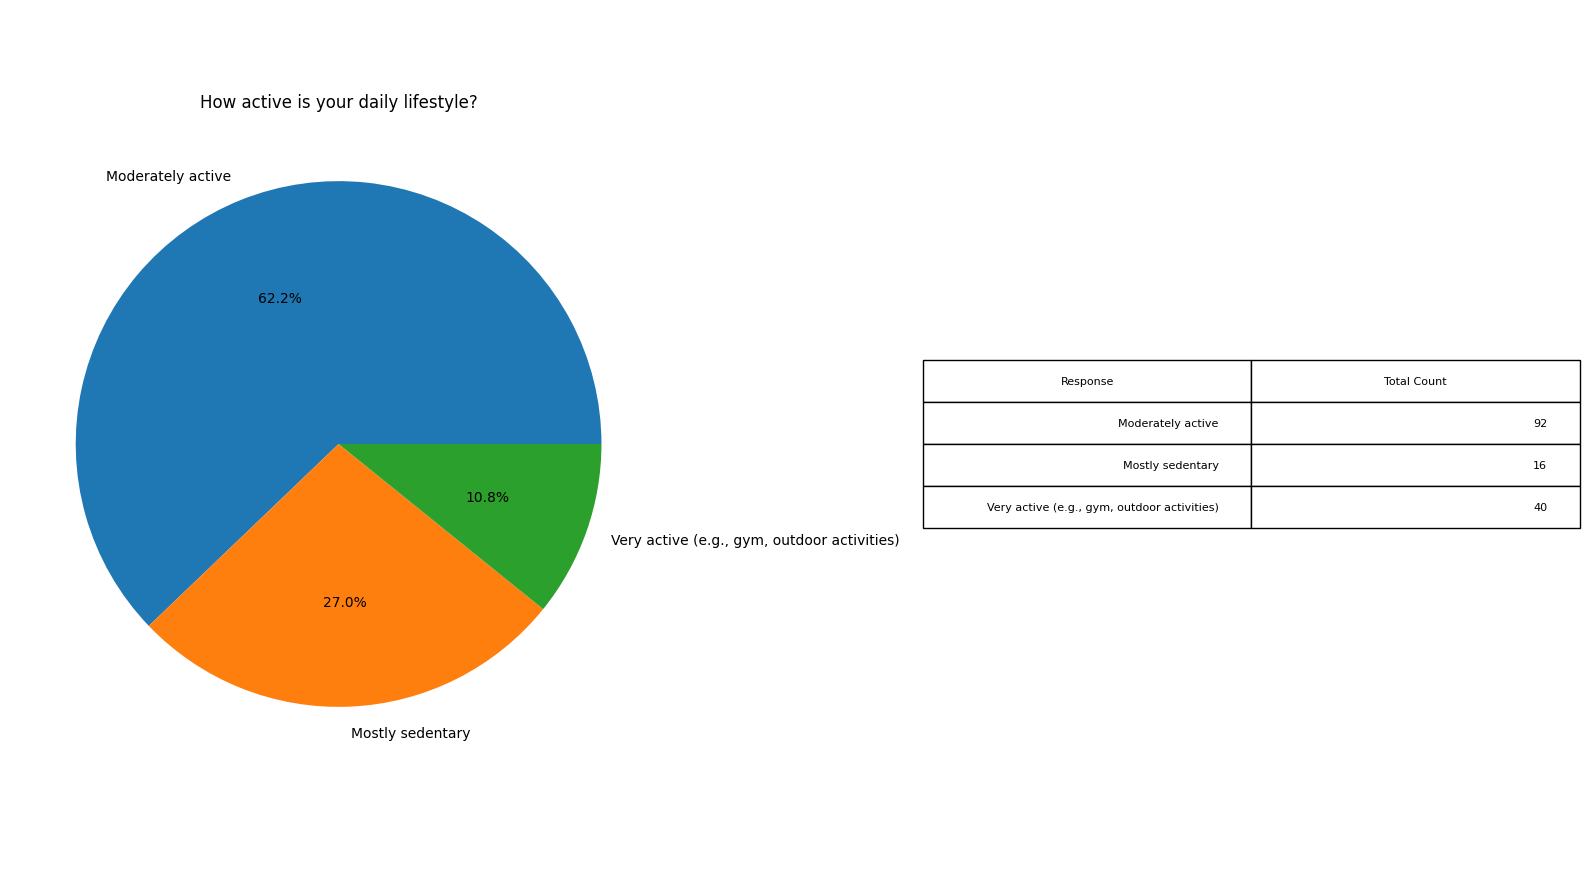

How important is comfort in your clothing choices


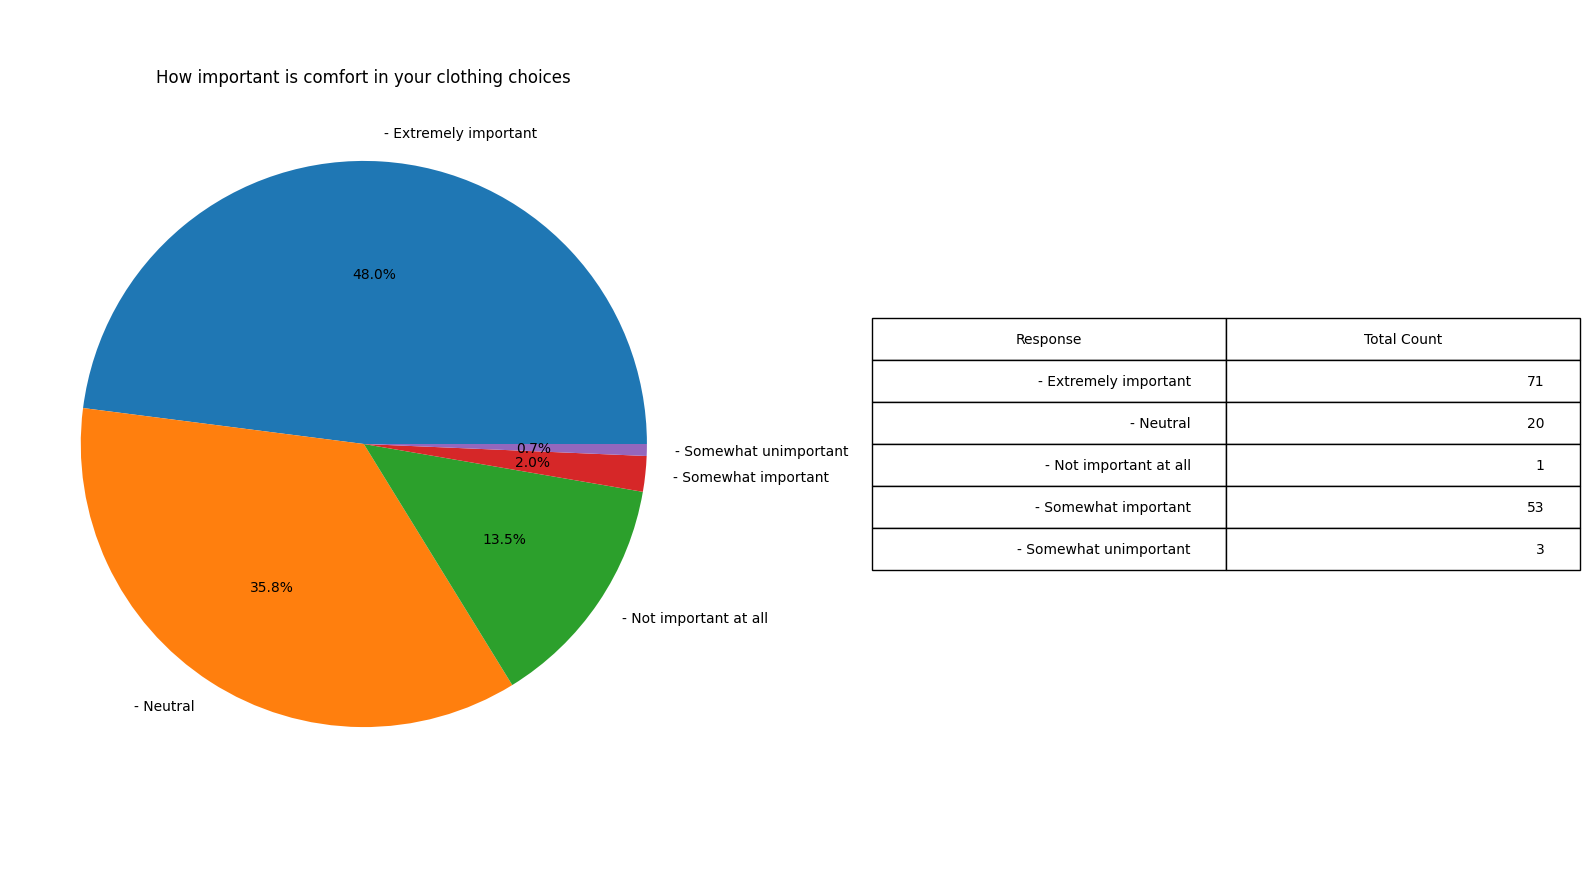

If you had to choose would you prefer timeless pieces or trendy items?


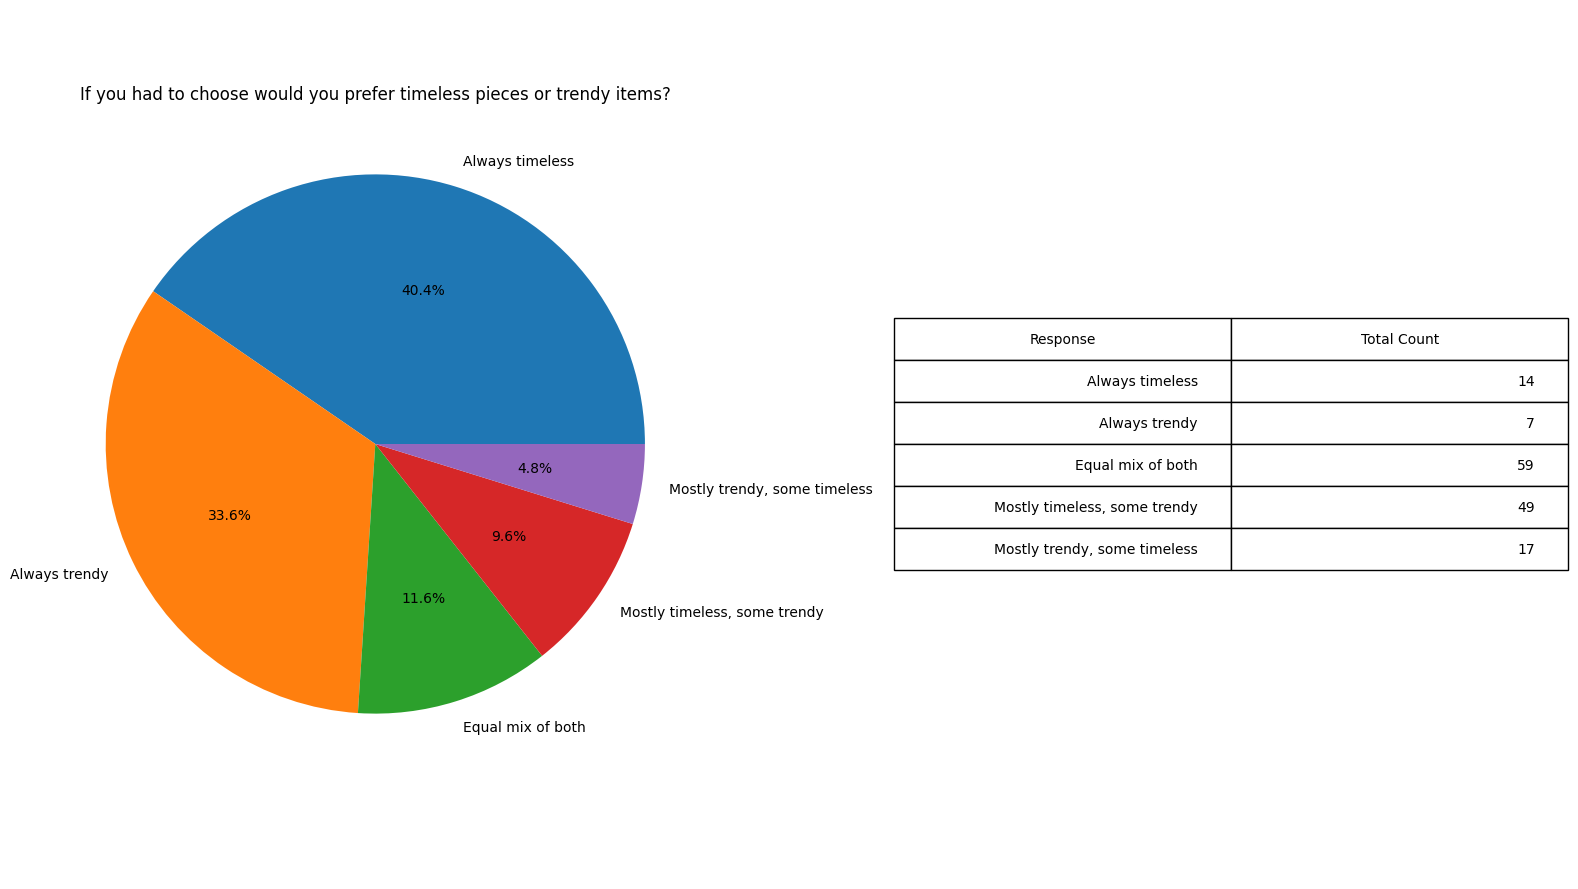

From scale 1-10 how much do you think your clothing style reflects about your personality?


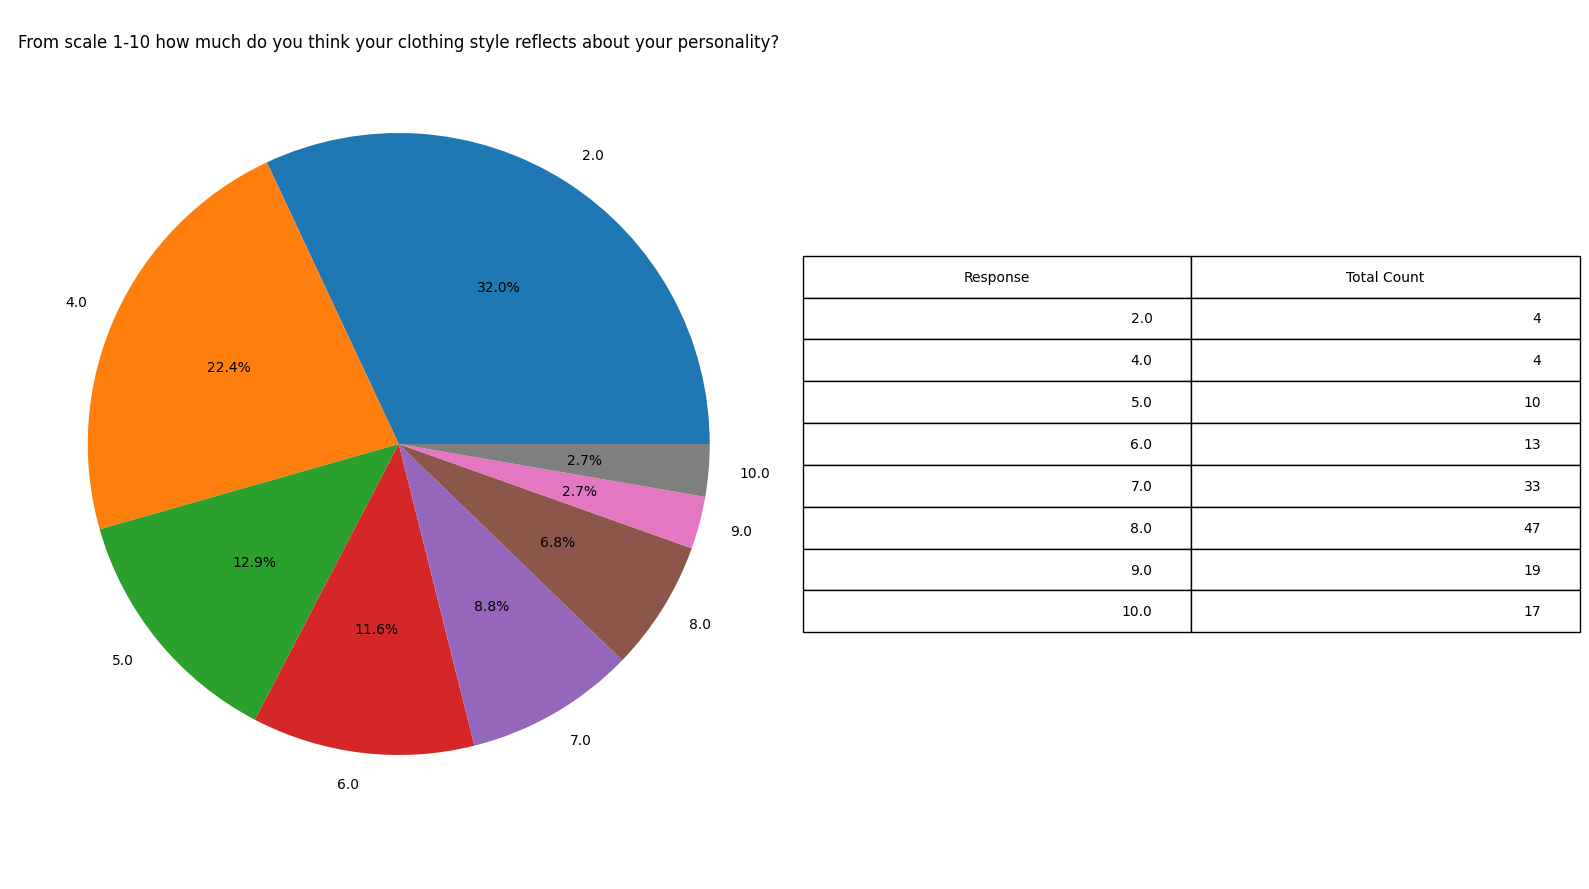

In [19]:
for question in df.columns[4:]:
  print(question)
  fig, (ax1,ax2) = plt.subplots(1, 2)
  ax1.pie(df[question].value_counts(), labels=df[question].cat.categories, autopct='%1.1f%%')
  ax1.set_title(question)

  value_counts = df[question].value_counts().sort_index()  # sort to match categorical order
  labels = df[question].cat.categories

  # Table on the right
  ax2.axis('off')  # turn off axis
  table_data = [[label, value_counts.get(label, 0)] for label in labels]

  table = ax2.table(cellText=table_data, colLabels=["Response", "Total Count"], loc='center')
  table.scale(1, 2)  # scale table for better readability
  plt.show()


## Survey-Results by Participant-Category

I alread mentioned that the participant-distribution isn't really equal, but for completion I'll plot the dirtribution over all three Categories:
- `Gender`
- `Profession`
- `Age Group`

Each question and its results is displayed as row, whereas each graph shows a possible distribution. A stacked Barplot provides a cleaner overview of the distribution per answer.

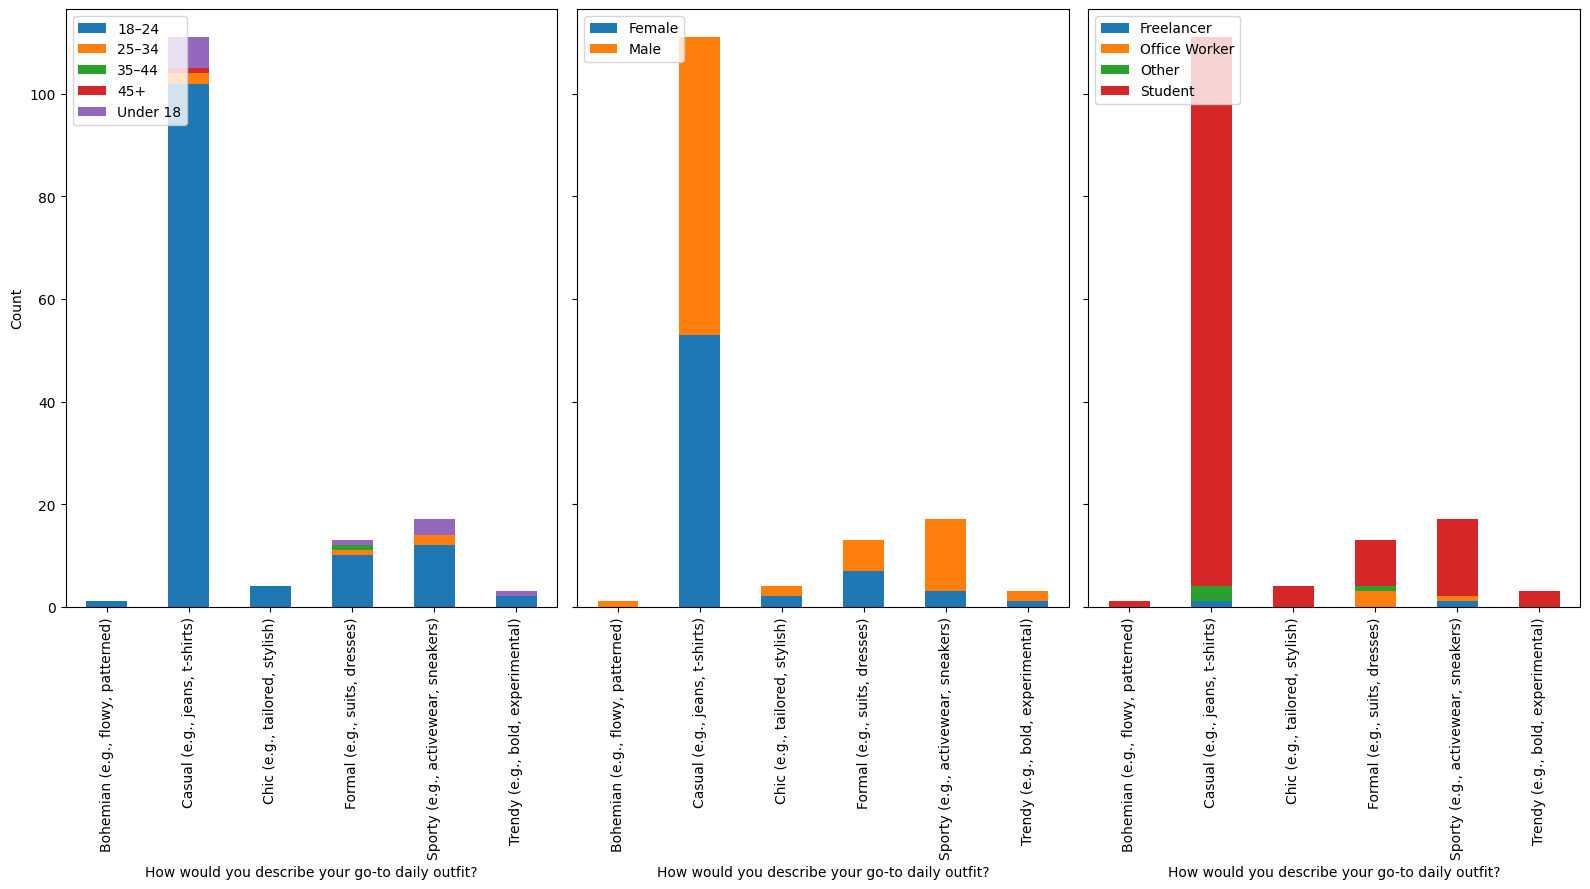

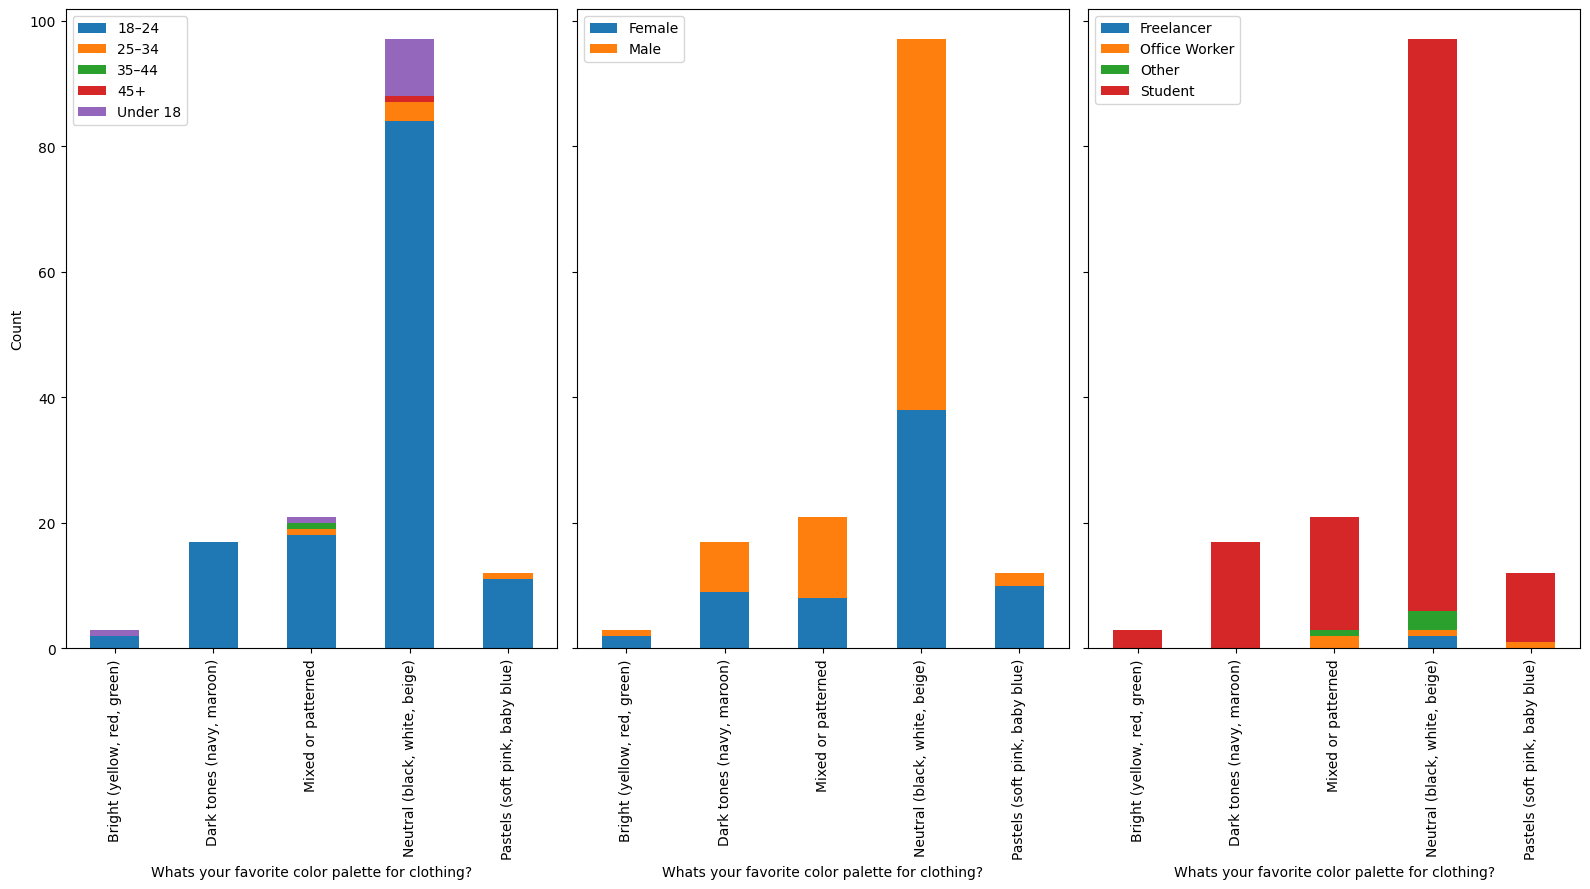

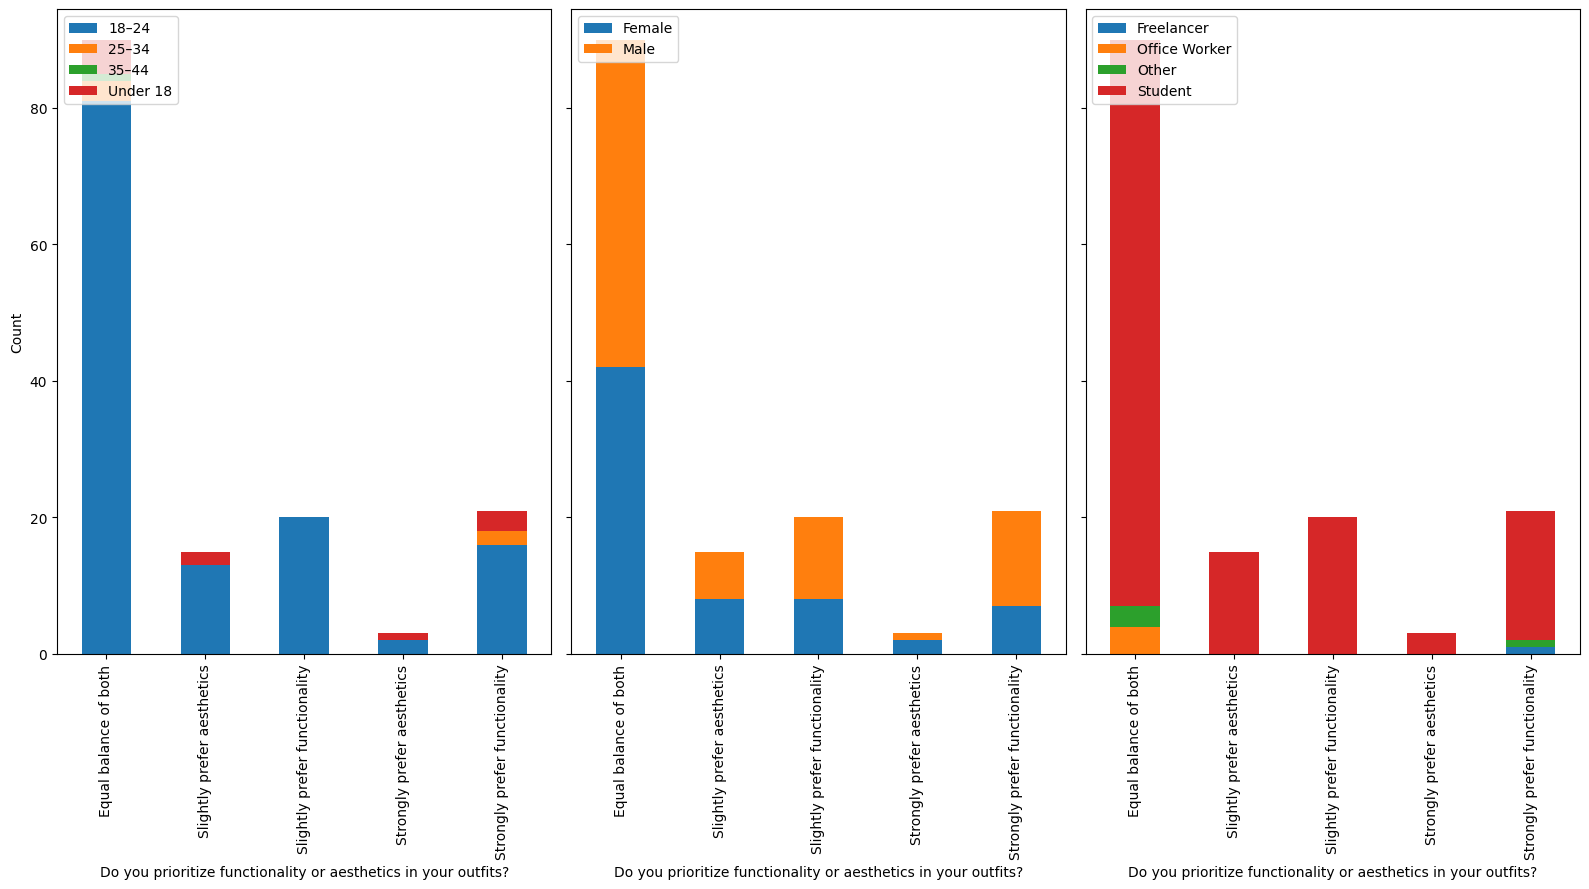

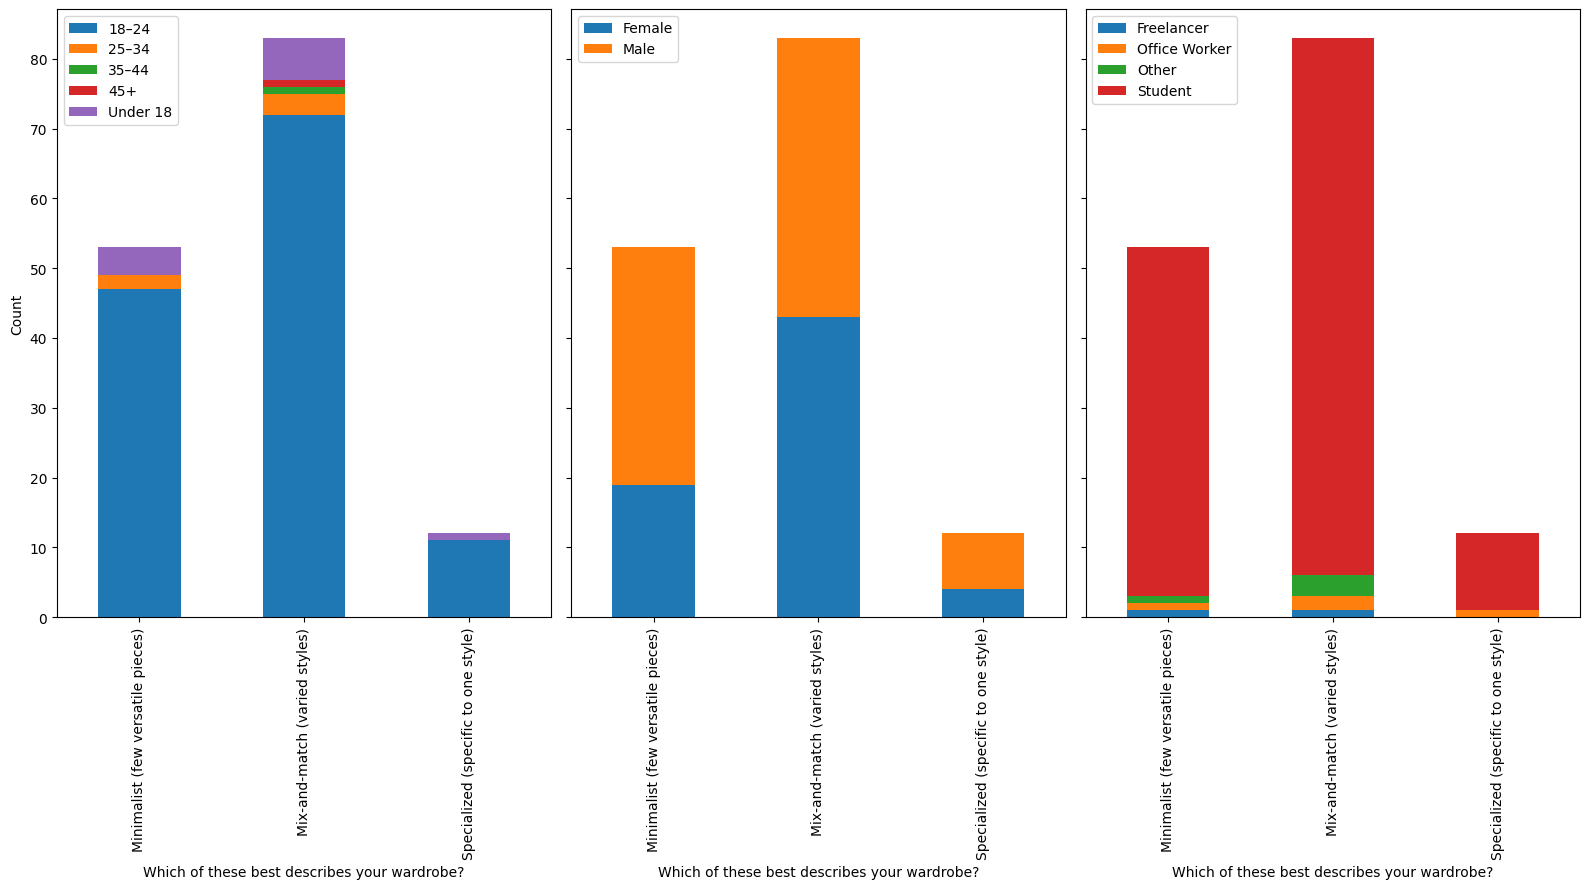

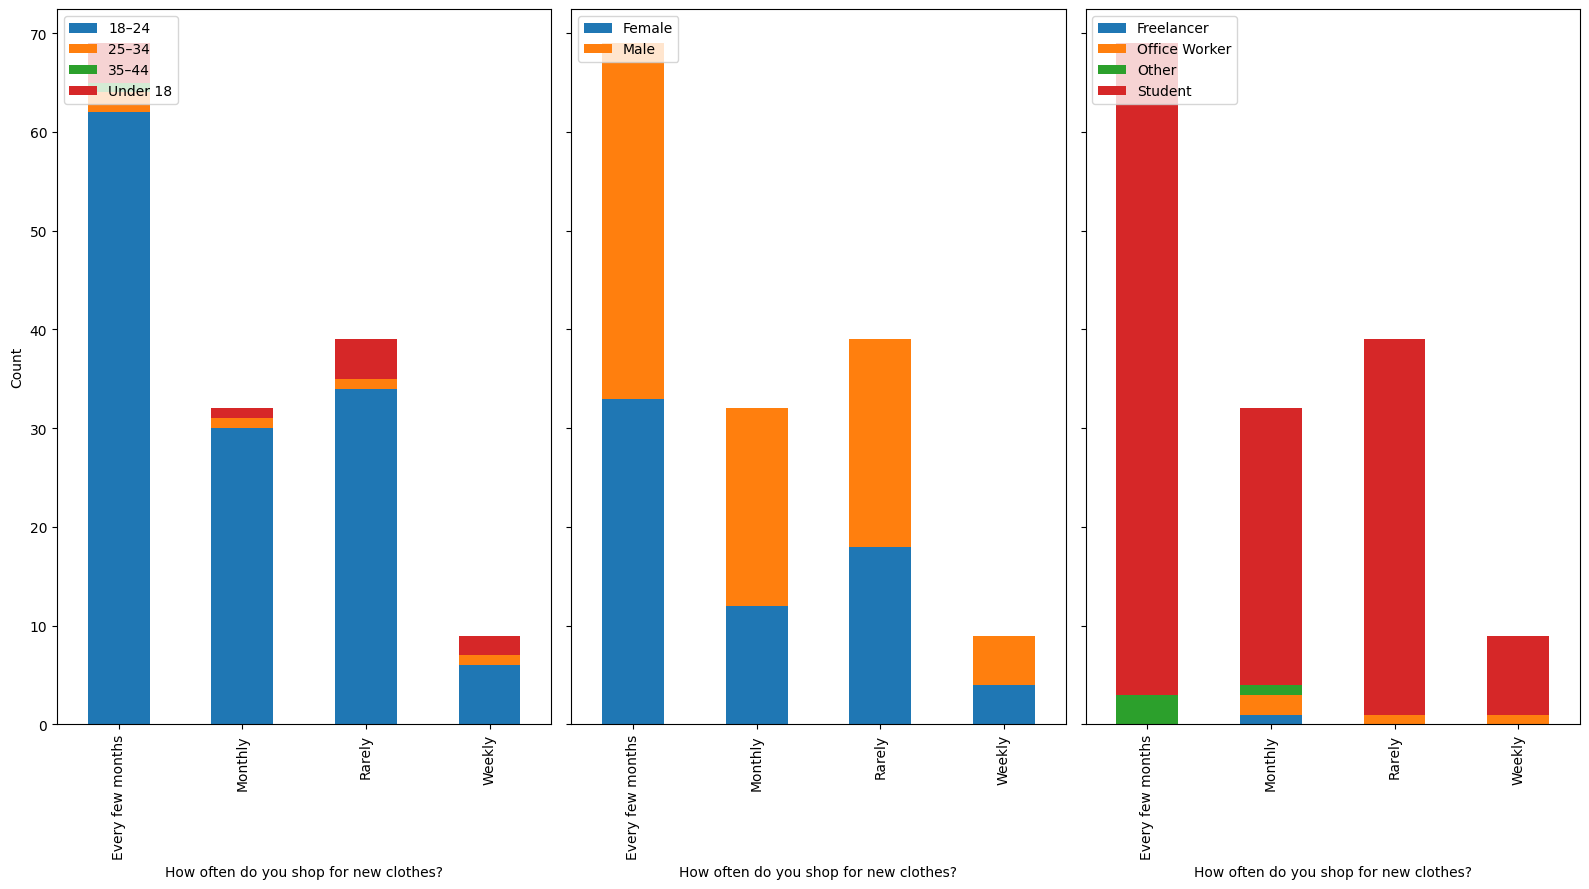

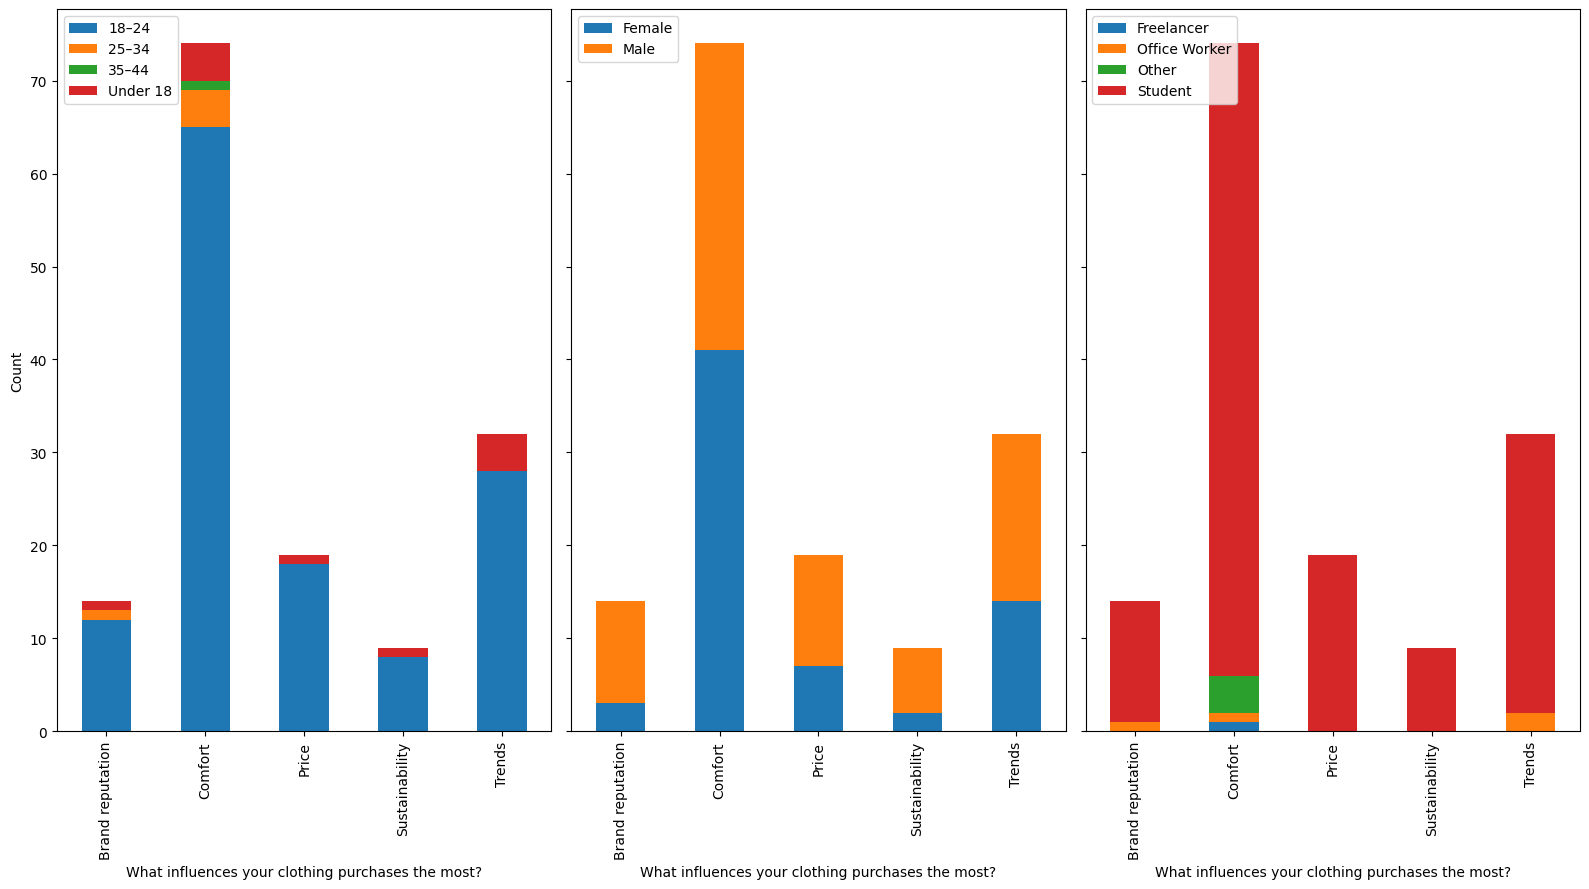

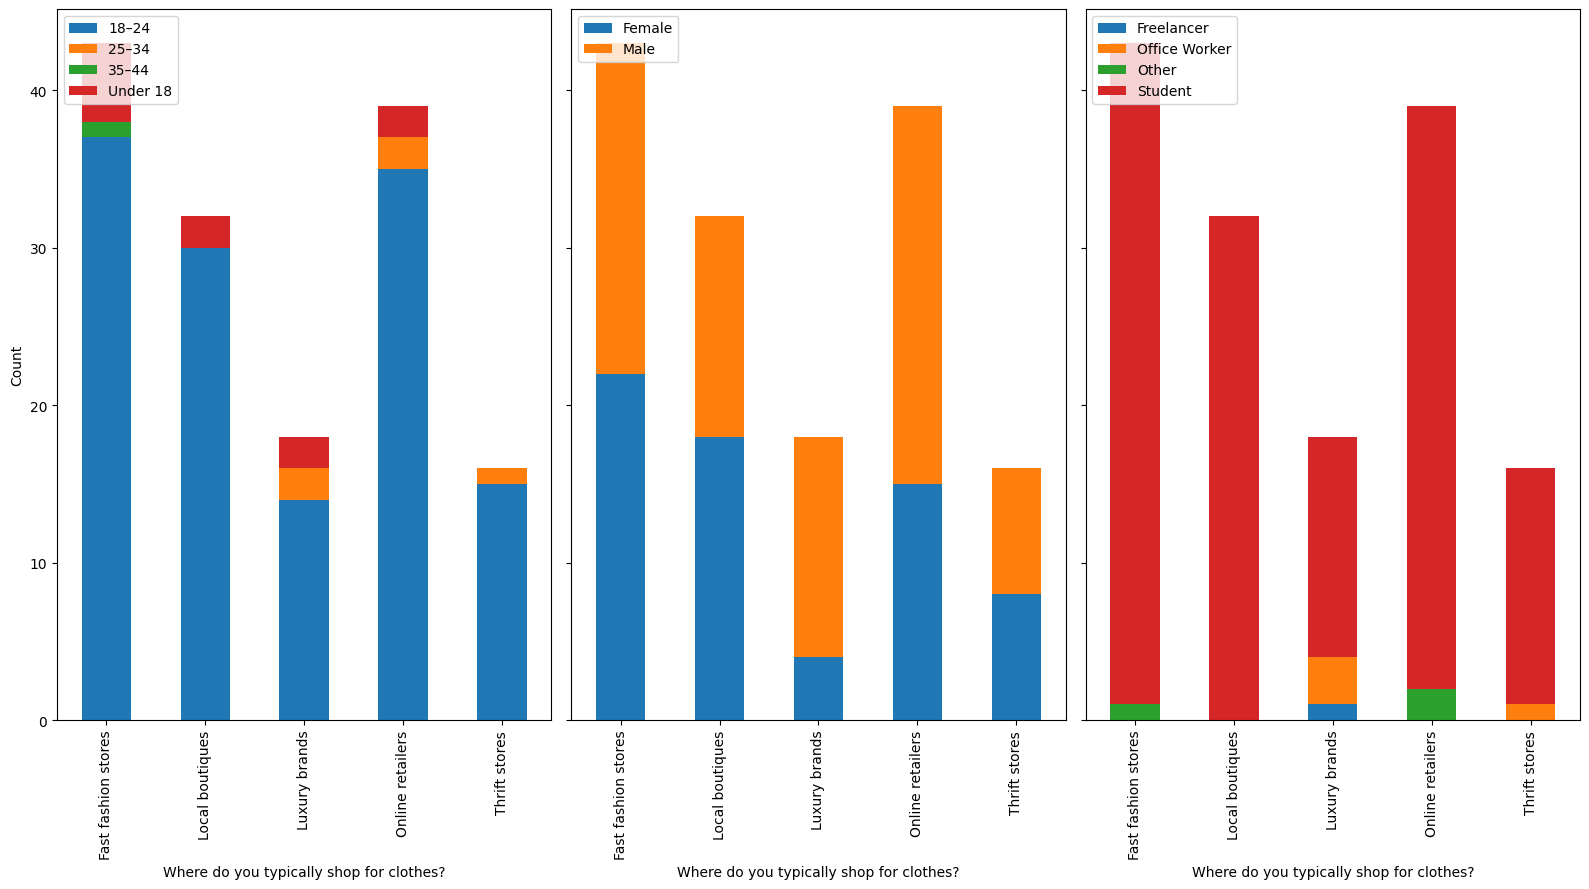

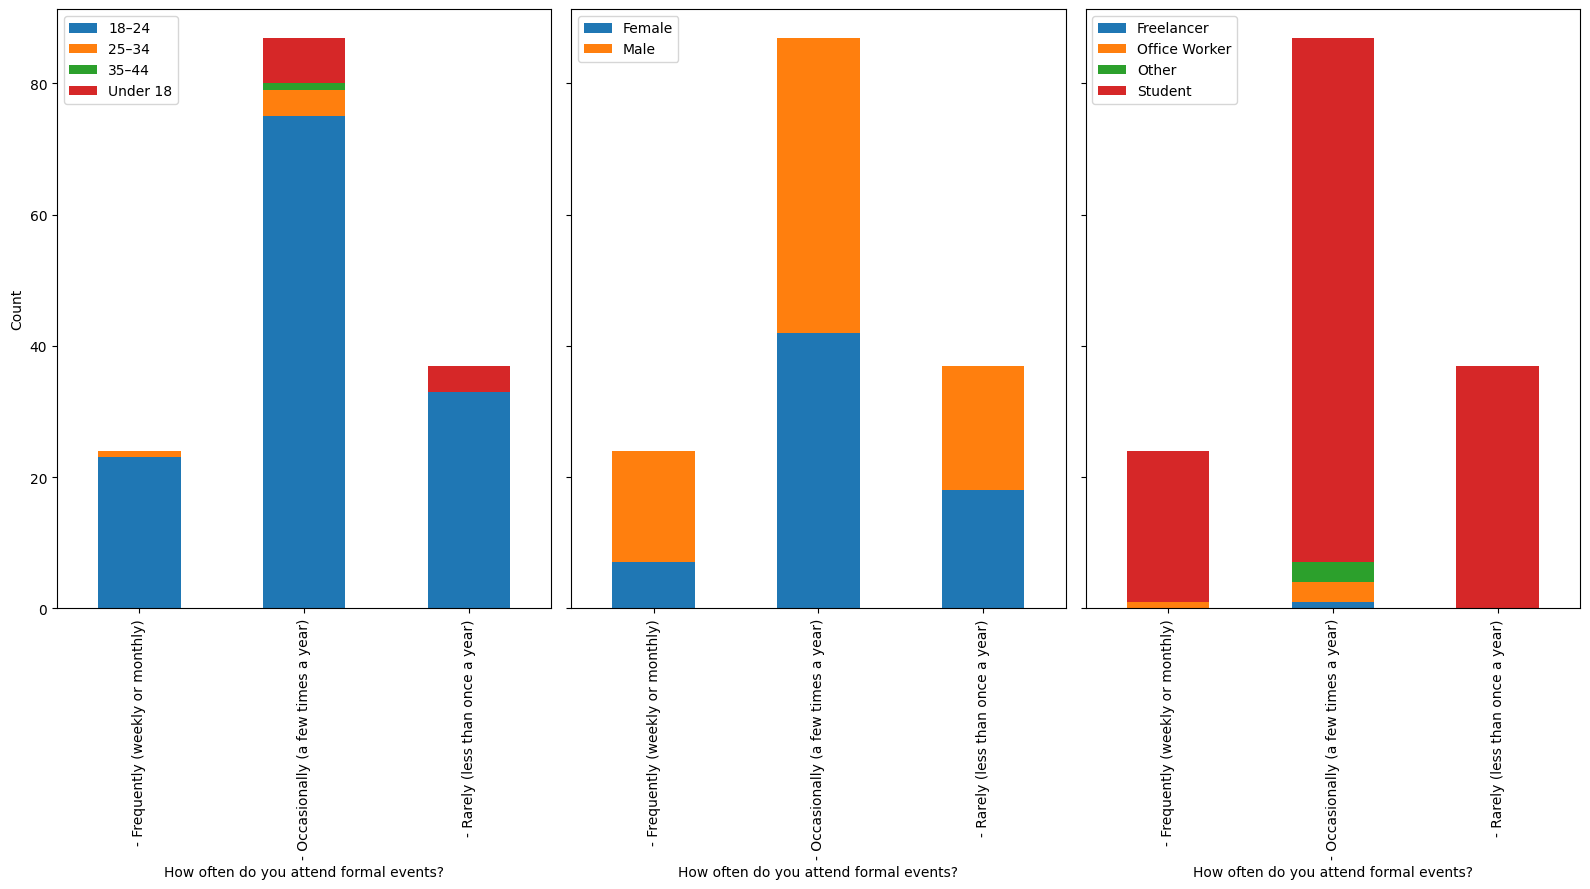

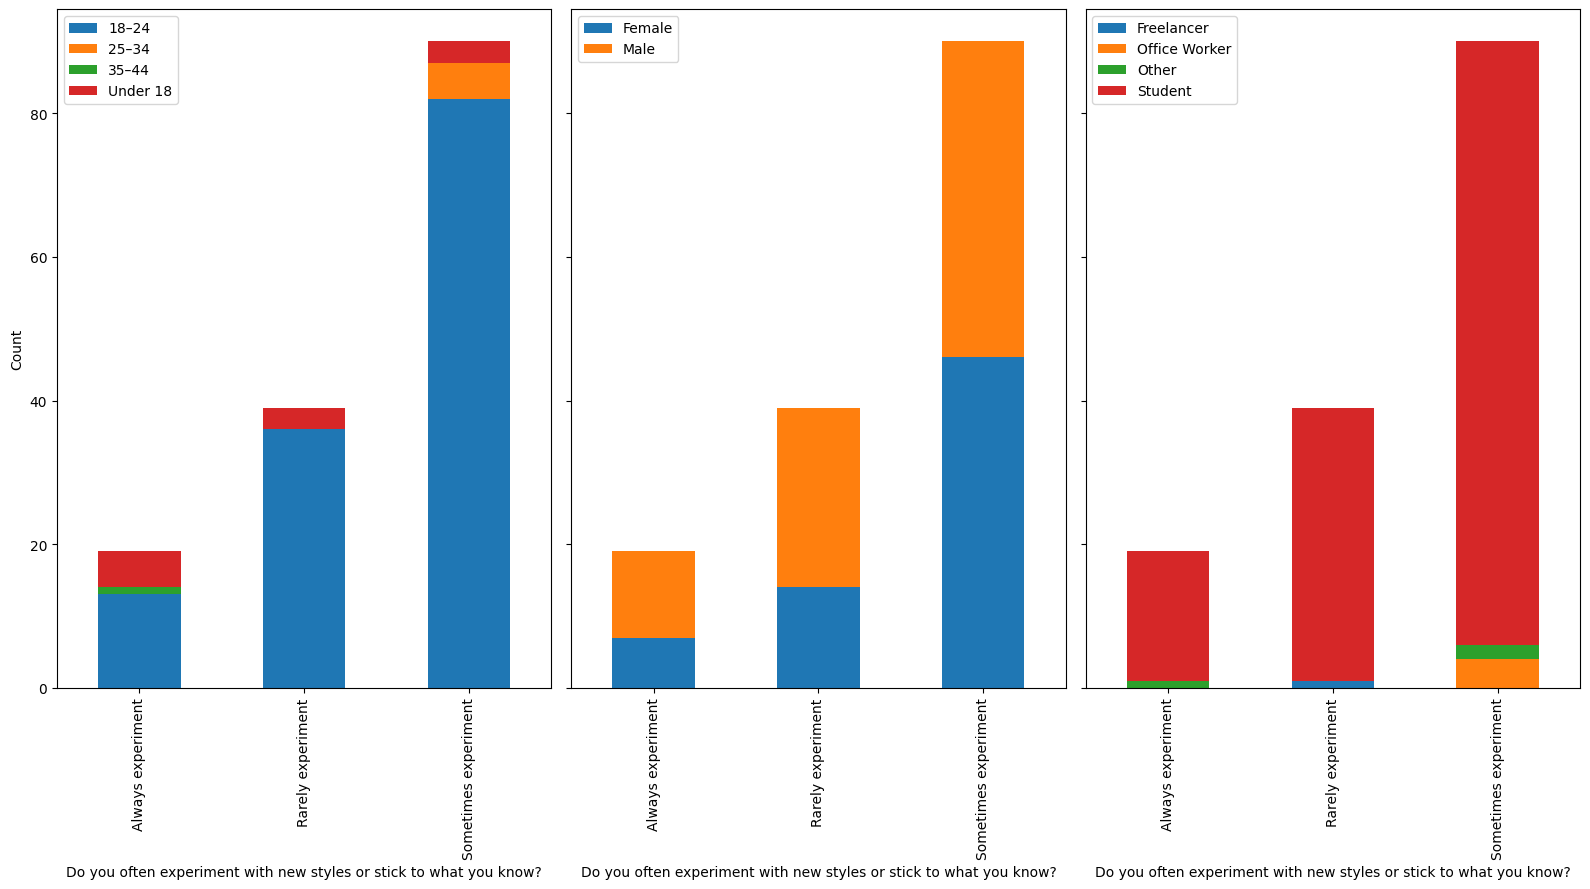

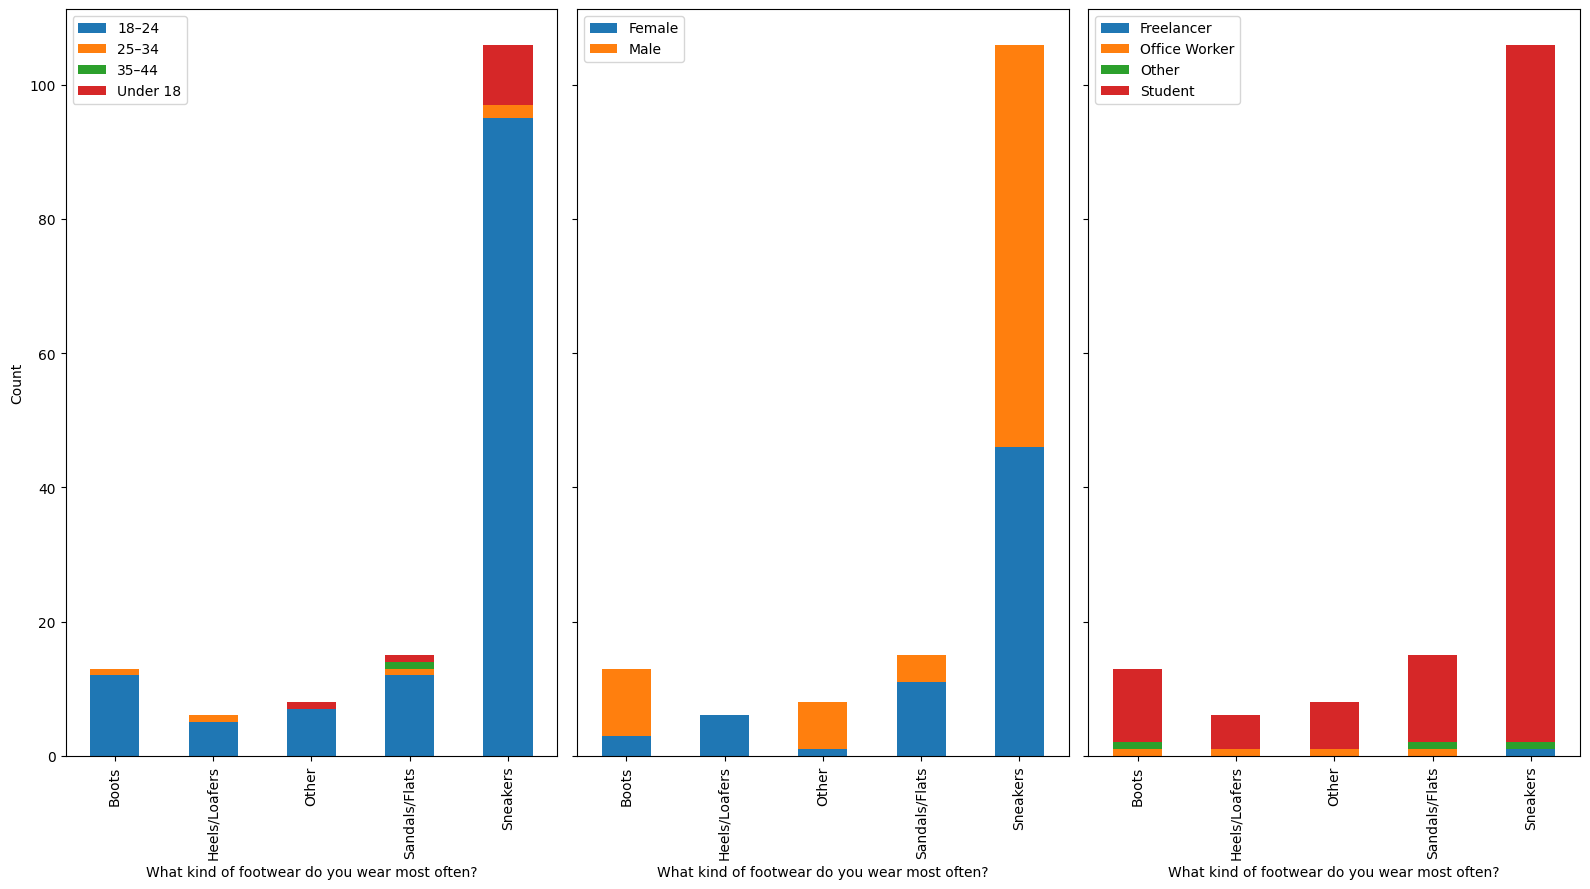

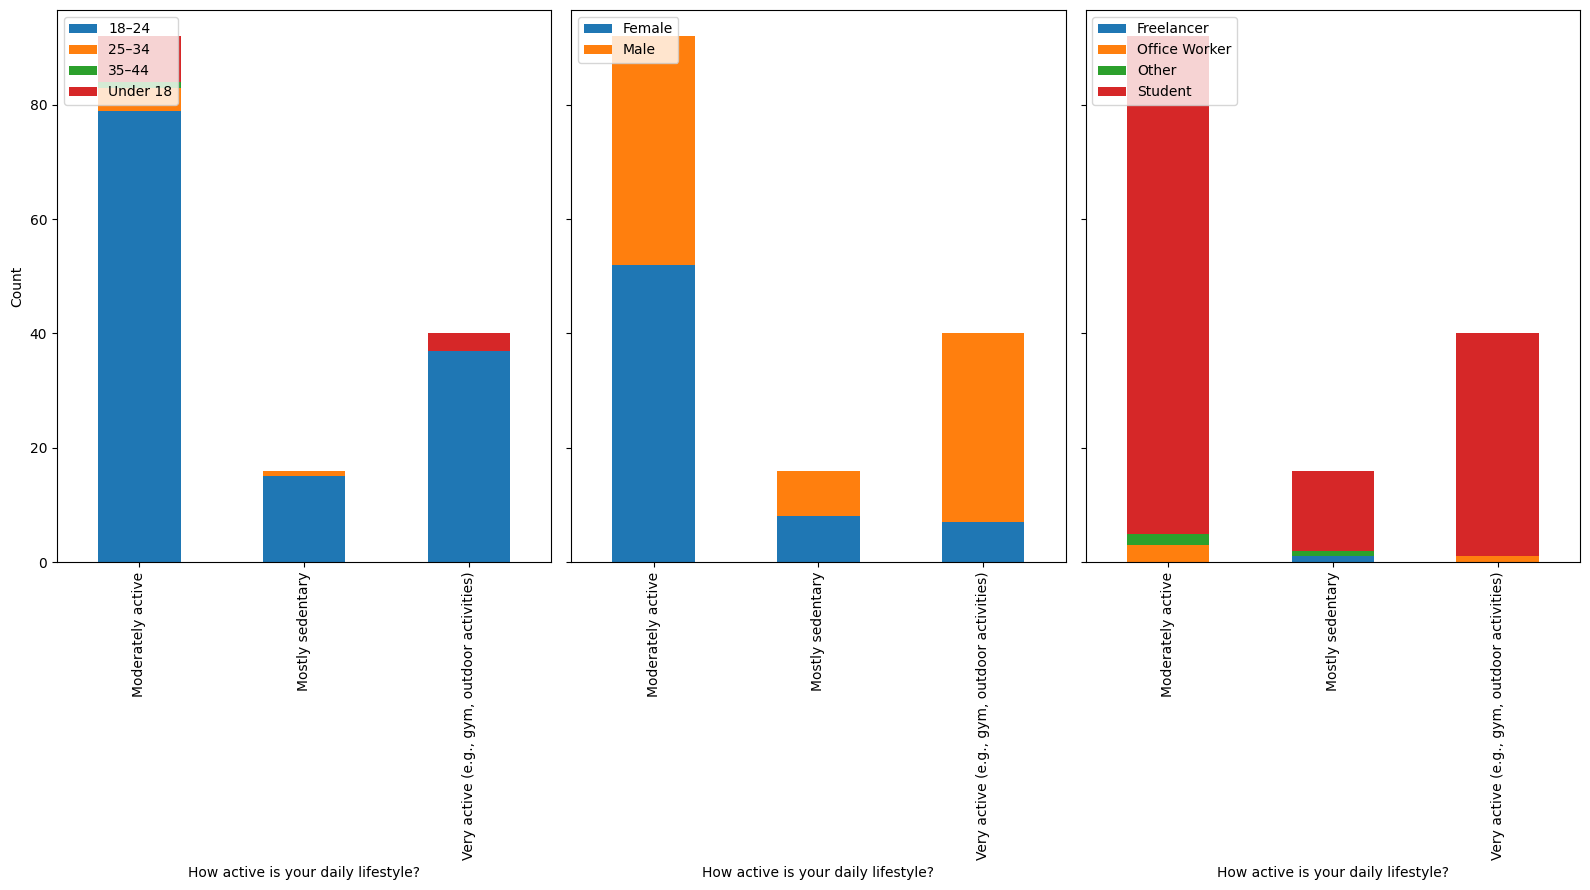

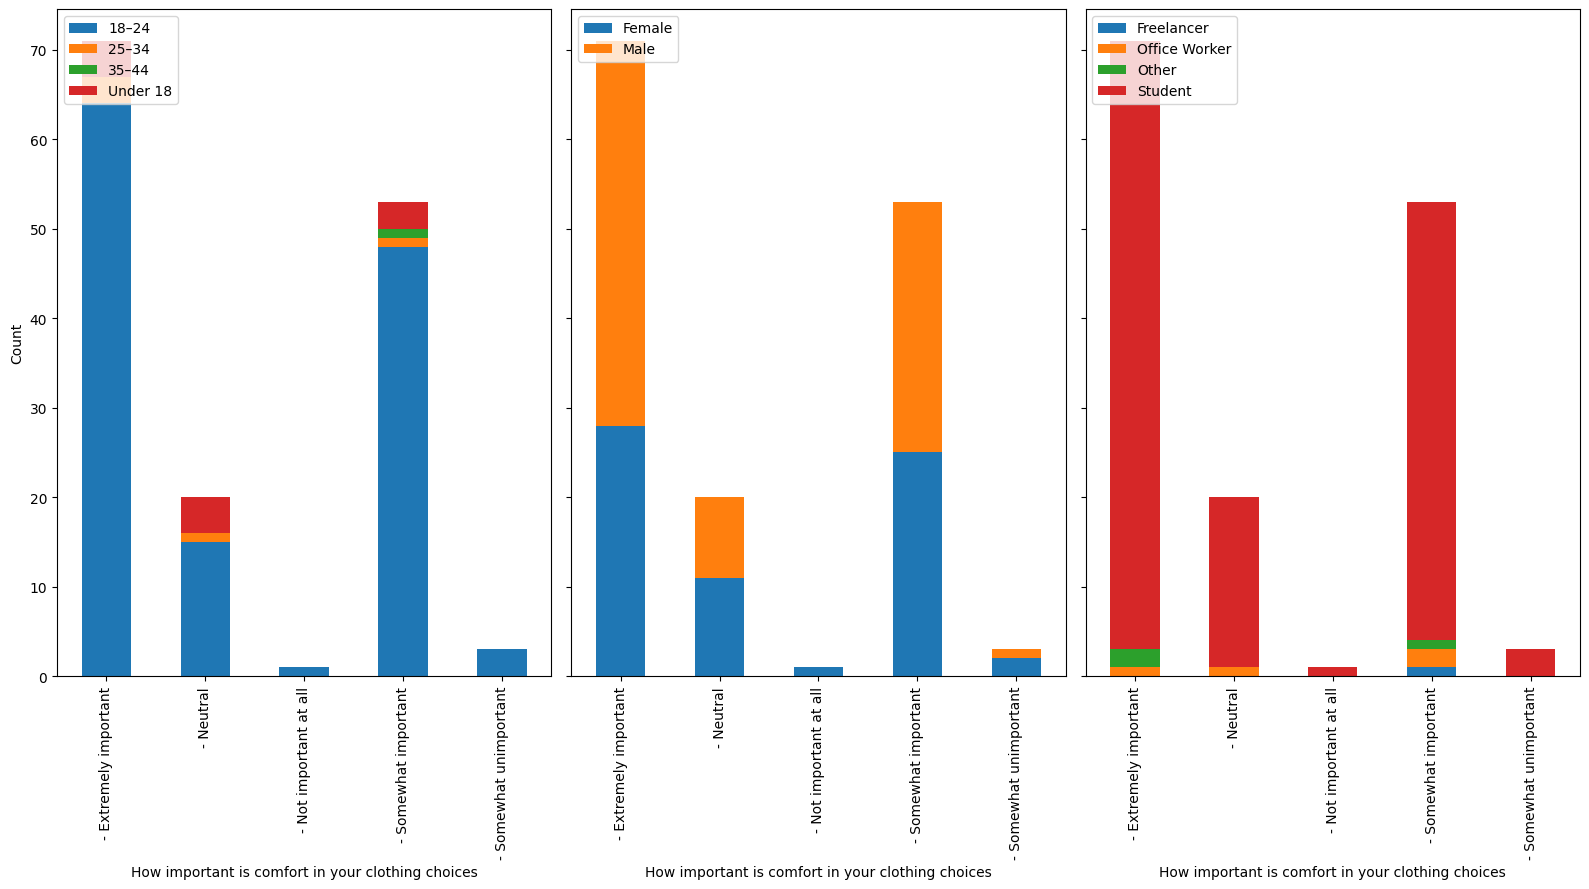

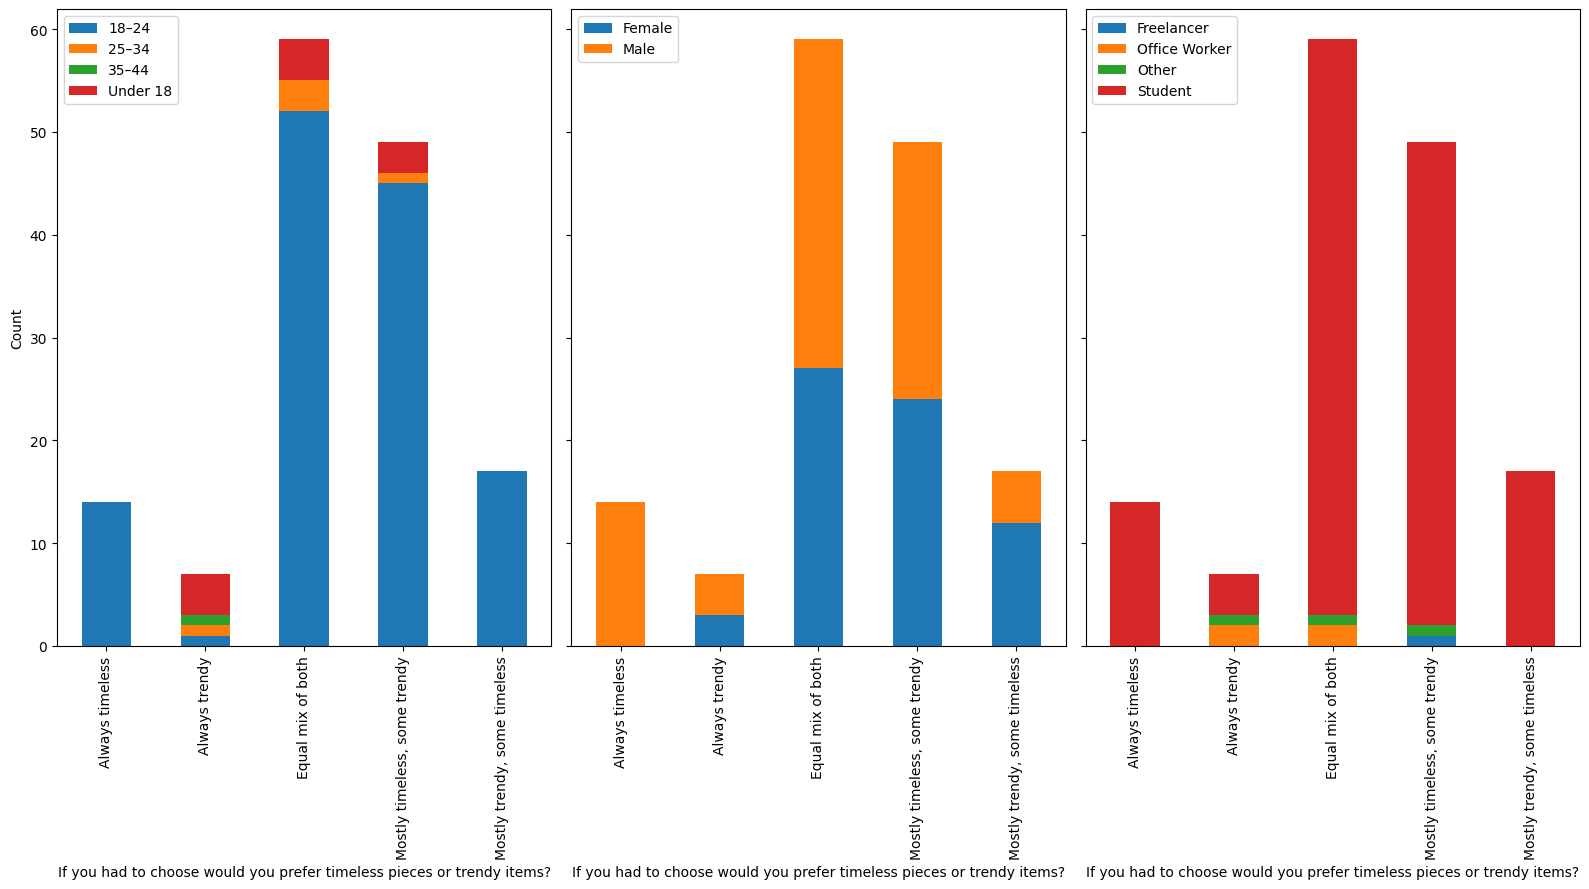

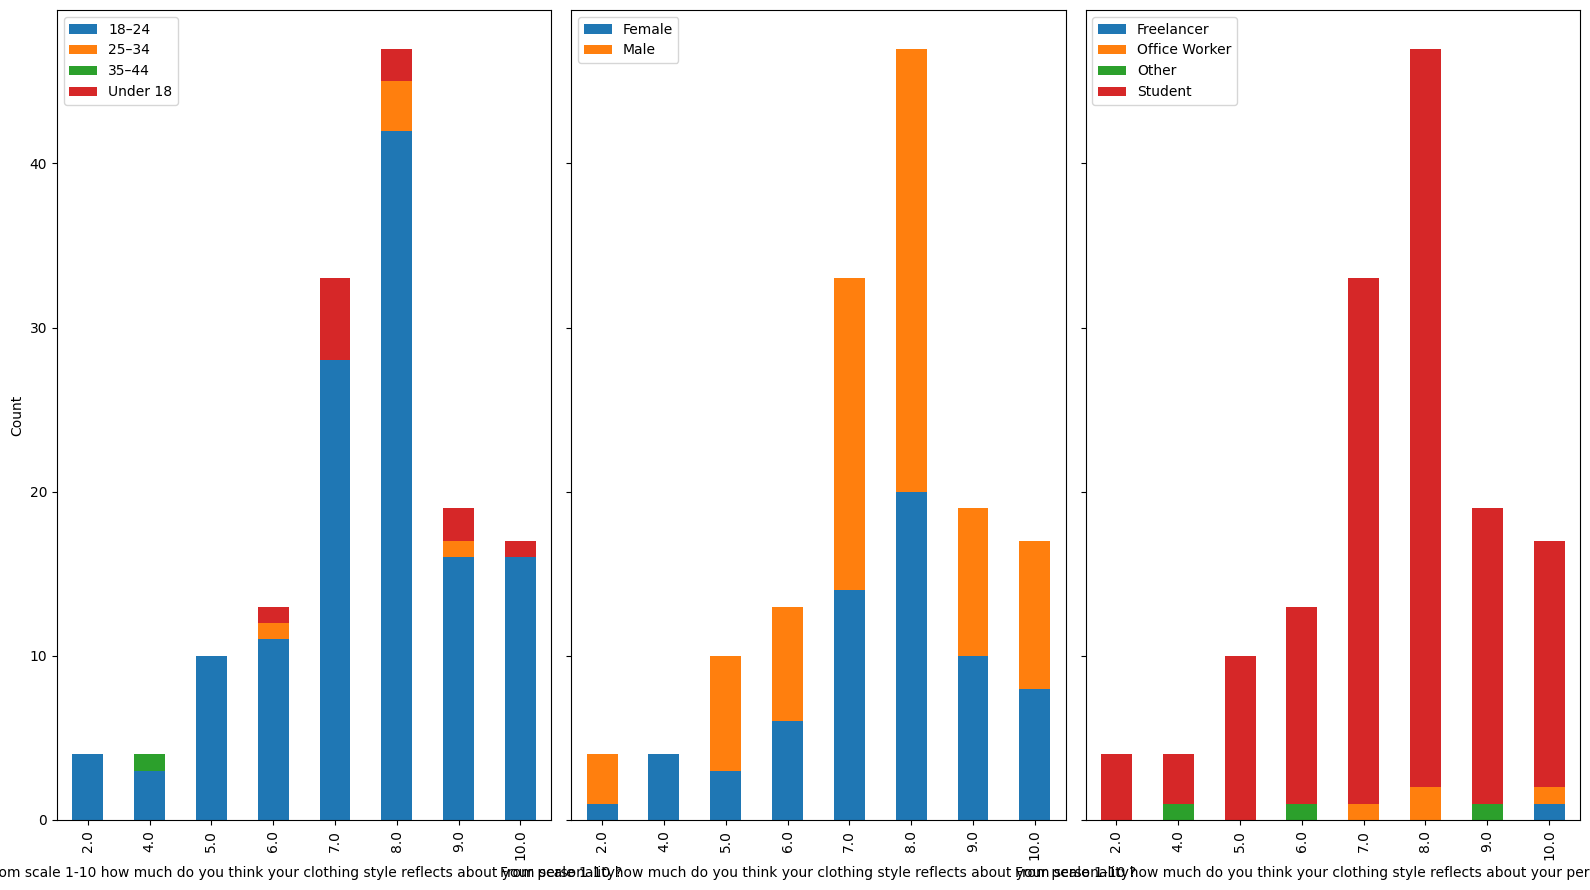

In [20]:
for question in df.columns[4:]:
  fig, axes = plt.subplots(1, 3, sharey=True)
  ax_counter = 0

  for distribution in df.columns[1:4]:
    counts = pd.crosstab(df[question], df[distribution])
    possible_answes = df[question].cat.categories

    # Plot raw counts
    counts.plot(kind='bar', stacked=True, ax=axes[ax_counter])
    axes[ax_counter].set_ylabel('Count')
    axes[ax_counter].legend(loc='upper left')
    ax_counter += 1


As expected the results for the distributions `Profession` and `Age Group` aren't really reliable because they are too unbalanced. Even if I would remove the Categories `Student` and `18-24` there would remain to few datapoints. Therefore I'll focus at the distribution `Gender` for this step of the evaluation. There are a few interesting Aspects if you compare the `gender`-results:

- Only men would describe their outfit as Bohemian (e.g. flowly, patterned).
- The distribution of favourite color palette is more distributed within the category `female` then `male`.
- The prioriization of functionality or aesthetics in their outfit is equaly distributed for both genders.
- There are more men then woman that shop new clothes every few months. Even though there also more men then woman that shop clothes weekly.
- Woman are influenced when buying new clothers mostly by comfort and trends. Men are influenced mostly by price and brand reputation.
- Luxury brands and online retailers are used by mens more then by woman. Local botiques are used more by woman then by men.
- Sandals and Heels are weared more by woman (obviously) then by men. Sneakers and boots are slightly more prefered by men then by woman.
- Slightly more men prefere timeless pieces then woman, whereas woman prefer trendy items.

### Searching for cross-relations
Next goal is to find cross-relations within the survey. I'll create a Cramers-V correlation matrix for an overview of all possible combinations.

Cramers-V is a measure of association between two categorical-variables.
- **0.1 to 0.2:** Weak association
- **0.2 to 0.4:** Moderate association
- **0.4 to 0.6:** Strong association
- **Above 0.6:** Very strong association

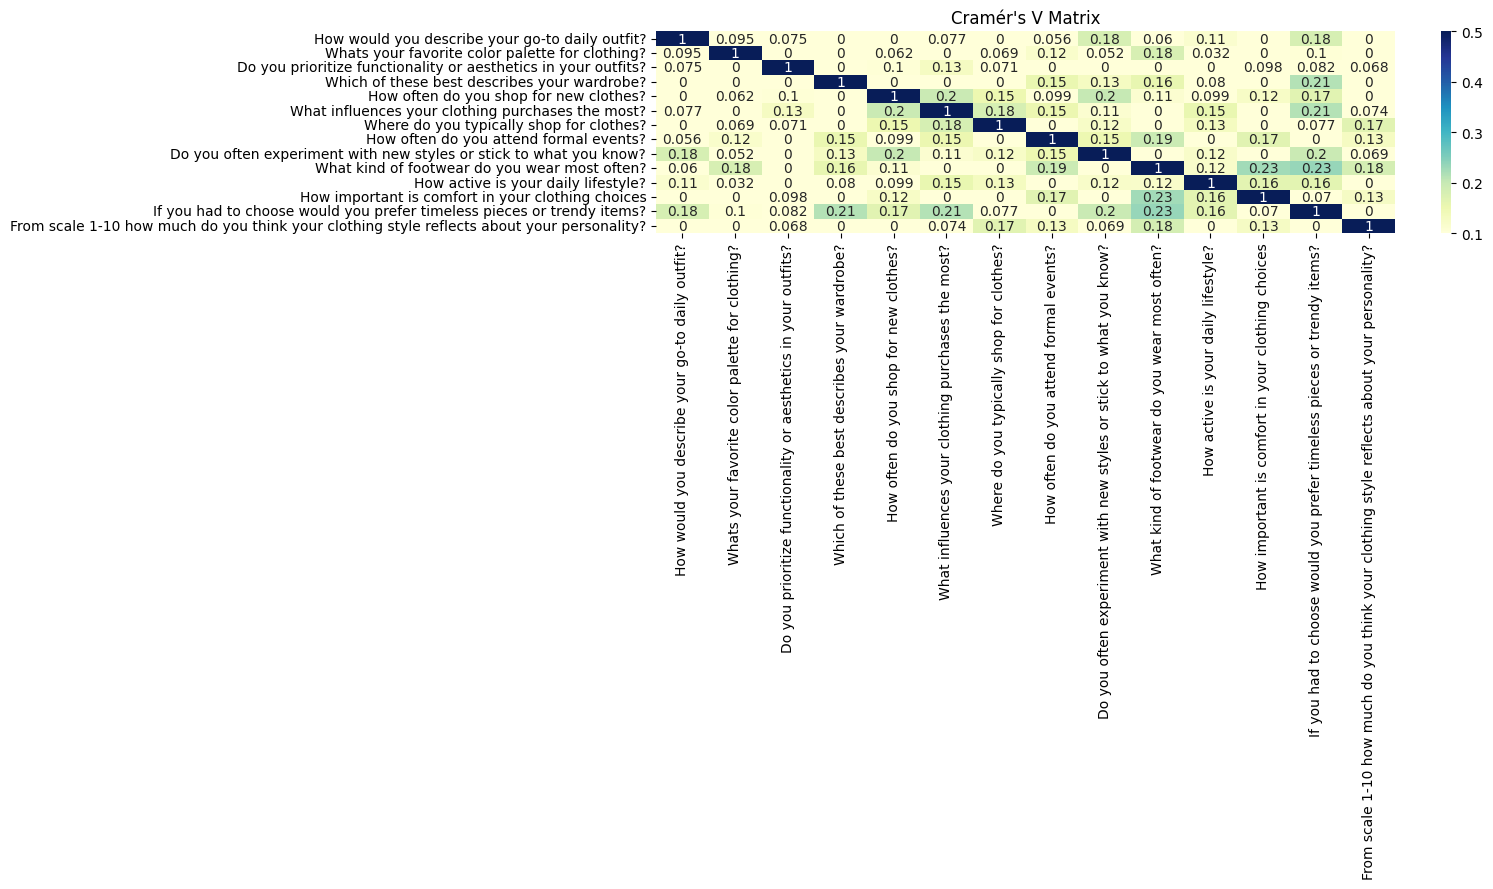

In [41]:
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

# Function to compute Cramér's V: https://www.geeksforgeeks.org/calculate-cramer-s-coefficient-matrix-using-pandas/
def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

    # Calculate Cramer's V
    n = contingency_table.sum().sum()
    phi2 = chi2_statistic / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    k_corr = k - (k - 1) * (k - 2) / (n - 1)
    r_corr = r - (r - 1) * (r - 2) / (n - 1)
    v = np.sqrt(phi2corr / min(k_corr - 1, r_corr - 1))

    return v

# Compute the Cramér's V correlation matrix
questions = df.columns[4:]  # list of survey question columns
correlation_matrix =  pd.DataFrame(index=questions, columns=questions, dtype=float)

# Calculate Cramér's V for each pair of variables
for var1 in questions:
    for var2 in questions:
        correlation_matrix.loc[var1, var2] = cramers_v(df[var1], df[var2])

sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", vmin=0.1, vmax=0.5)
plt.title('Cramér\'s V Matrix')
plt.show()

It seems that there is no stronger correlation between the survey-results. At least there is a moderate association between this questions:
- If you would choose would you prefer timeless-pieces or trendy items?
- Which of these best describes your warderobe?
- What influences your clothing purchases the most?
- Do you often experiment with new styles or stick to what you know?
- What kind of footwear do you wear most often?  

## Conclusion

Unfortunatly I could not discover any interesting or surprising correlation between the questions of the survey. As already mentioned the unproper distribution between the dataset-categories could influence the evaluation-results. The detailed evaulation within the `gender`-Category showed slightly differences between male and female shopping behaviours and the ending cramers-v-matrix showed that there weren't any high crossrelations between the survey-results.